# Problem Statement

Dengan jumlah user yang semakin meningkat, banyak user
yang diacquired hanya untuk memenuhi jumlah user target dari
perusahaan Fashion Campus. Tim Marketing diberikan tugas
untuk membuat promo yang menarik untuk menarik perhatian
user. Namun, hal ini berdampak dengan banyaknya user yang
tidak organic, dimana mereka banyak yang tidak kembali lagi
ke platform untuk melakukan transaksi. Churn rate dari user
pun meningkat. **Team Data Science** diberikan tugas untuk menganalisa
kejadian ini dengan membuat churn prediction model.

# Data Preparation

## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.font_manager
sns.set(rc={"axes.facecolor":"#FFF1E6",
            "figure.facecolor":"#EDDCD2"})
# pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [ ]:
customer_df = pd.read_csv('/content/drive/MyDrive/startupcampus/customer.csv')
product_df = pd.read_csv('/content/drive/MyDrive/startupcampus/product.csv', error_bad_lines=False)
transactions_df = pd.read_csv('/content/drive/MyDrive/startupcampus/transactions.csv')
# click_stream_df = pd.read_csv('/content/drive/MyDrive/startupcampus/new_click_stream.csv')

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

## Tabel Customer

In [ ]:
customer_df.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

## Tabel Product

In [ ]:
product_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


## Tabel Transcations

In [ ]:
transactions_df.head()

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

### Handling Metadata

In [ ]:
import ast

tmp = transactions_df.iloc[:,4].astype('str')
tmp = tmp.map(lambda x:ast.literal_eval(x))
tmp = tmp.to_frame()

transactions_df['product_metadata'] = tmp['product_metadata']
transactions_df = transactions_df.explode('product_metadata')

In [ ]:
transactions_df.reset_index()

,index,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"{'product_id': 54728, 'quantity': 1, 'item_pri...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"{'product_id': 16193, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"{'product_id': 53686, 'quantity': 4, 'item_pri...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"{'product_id': 20228, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"{'product_id': 55220, 'quantity': 1, 'item_pri...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254580,852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"{'product_id': 30642, 'quantity': 2, 'item_pri...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
1254581,852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"{'product_id': 19394, 'quantity': 1, 'item_pri...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
1254582,852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"{'product_id': 13079, 'quantity': 4, 'item_pri...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
1254583,852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"{'product_id': 11312, 'quantity': 1, 'item_pri...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


In [ ]:
tmp = pd.json_normalize(transactions_df.product_metadata)

In [ ]:
transactions_df = pd.concat([transactions_df.reset_index(), tmp], join='outer',axis=1)

In [ ]:
transactions_df.drop(transactions_df.columns[[0,5]],axis=1, inplace=True)
transactions_df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

# Data Cleansing

## Combining Dataset

In [ ]:
product_df.rename(columns={'id':'product_id'}, inplace=True)

In [ ]:
product_df.drop('gender', axis=1, inplace=True)

dataset1 = pd.merge(customer_df, transactions_df, how='right', on='customer_id')

dataset = pd.merge(dataset1, product_df, how='left', on='product_id')

In [ ]:
dataset.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag
3,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-11-01T11:23:48.365620Z,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,Apparel,Topwear,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater
4,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-12-18T11:20:30.365620Z,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,Personal Care,Lips,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 38 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1254585 non-null  int64  
 1   first_name              1254585 non-null  object 
 2   last_name               1254585 non-null  object 
 3   username                1254585 non-null  object 
 4   email                   1254585 non-null  object 
 5   gender                  1254585 non-null  object 
 6   birthdate               1254585 non-null  object 
 7   device_type             1254585 non-null  object 
 8   device_id               1254585 non-null  object 
 9   device_version          1254585 non-null  object 
 10  home_location_lat       1254585 non-null  float64
 11  home_location_long      1254585 non-null  float64
 12  home_location           1254585 non-null  object 
 13  home_country            1254585 non-null  object 
 14  fi

In [ ]:
dataset.isnull().sum()

customer_id                    0
first_name                     0
last_name                      0
username                       0
email                          0
gender                         0
birthdate                      0
device_type                    0
device_id                      0
device_version                 0
home_location_lat              0
home_location_long             0
home_location                  0
home_country                   0
first_join_date                0
created_at                     0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
masterCate

## Handling Missing Values

In [ ]:
filled_dataset = dataset.copy()

filled_dataset['promo_code'] = filled_dataset['promo_code'].fillna('None')

In [ ]:
null_categorical = filled_dataset[['masterCategory',
                                  'subCategory',
                                  'articleType', 
                                  'baseColour',
                                  'season',
                                  'usage',
                                  'productDisplayName']]

filled_dataset = filled_dataset.fillna(null_categorical.mode().iloc[0])

In [ ]:
filled_dataset = filled_dataset.fillna(filled_dataset['year'].mode()[0])

In [ ]:
filled_dataset.head(3)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag


In [ ]:
filled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 38 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1254585 non-null  int64  
 1   first_name              1254585 non-null  object 
 2   last_name               1254585 non-null  object 
 3   username                1254585 non-null  object 
 4   email                   1254585 non-null  object 
 5   gender                  1254585 non-null  object 
 6   birthdate               1254585 non-null  object 
 7   device_type             1254585 non-null  object 
 8   device_id               1254585 non-null  object 
 9   device_version          1254585 non-null  object 
 10  home_location_lat       1254585 non-null  float64
 11  home_location_long      1254585 non-null  float64
 12  home_location           1254585 non-null  object 
 13  home_country            1254585 non-null  object 
 14  fi

## Reformatting Data Types

In [ ]:
formatted_dataset = filled_dataset.copy()

object_columns = ['customer_id',
                  'product_id',
                  'home_location_lat',
                  'home_location_long',
                  'shipment_location_lat',
                  'shipment_location_long']

formatted_dataset[object_columns] = formatted_dataset[object_columns].astype(str)

In [ ]:
formatted_dataset['year'] = formatted_dataset['year'].astype(int)

In [ ]:
from datetime import datetime, date

date_columns = ['birthdate',
                'first_join_date',
                'created_at',
                'shipment_date_limit']

formatted_dataset[date_columns] = formatted_dataset[date_columns].apply(pd.to_datetime, errors='coerce')

date_columns = ['created_at', 'shipment_date_limit']

formatted_dataset['created_at'] = formatted_dataset['created_at'].dt.strftime('%Y-%m-%d')
formatted_dataset['shipment_date_limit'] = formatted_dataset['shipment_date_limit'].dt.strftime('%Y-%m-%d')

formatted_dataset[date_columns] = formatted_dataset[date_columns].apply(pd.to_datetime, errors='coerce')

## Renaming Columns

In [ ]:
renamed_dataset = formatted_dataset.copy()

In [ ]:
renamed_dataset.rename(columns = {'customer_id':'Customer ID',
                                  'first_name':'First Name',
                                  'last_name':'Last Name',	
                                  'username':'Username',	
                                  'email':'Email',
                                  'gender':'Gender',	
                                  'birthdate':'Birthday',	
                                  'device_type':'Device Type',	
                                  'device_id':'Device ID',	
                                  'device_version':'Device Version',	
                                  'home_location_lat':'Home Location Latitude',	
                                  'home_location_long':'Home Location Longitude',	
                                  'home_location':'Home Location',
                                  'home_country':'Home Country',	
                                  'first_join_date':'First Join Date',	
                                  'created_at':'Created At',
                                  'booking_id':'Booking ID',	
                                  'session_id':'Session ID',	
                                  'payment_method':'Payment Method',	
                                  'payment_status':'Payment Status',	
                                  'promo_amount':'Promo Amount',	
                                  'promo_code':'Promo Code',	
                                  'shipment_fee':'Shipment Fee',	
                                  'shipment_date_limit':'Shipment Date Limit',	
                                  'shipment_location_lat':'Shipment Location Latitude',	
                                  'shipment_location_long':'Shipment Location Longitude',	
                                  'total_amount':'Total Amount',	
                                  'product_id':'Product ID',	
                                  'quantity':'Quantity',	
                                  'item_price':'Item Price',	
                                  'masterCategory':'Master Category',	
                                  'subCategory':'Sub Category',	
                                  'articleType':'Article Type',	
                                  'baseColour':'Base Colour',	
                                  'season':'Season',	
                                  'year':'Year',	
                                  'usage':'Usage',	
                                  'productDisplayName':'Product Display Name'}, inplace = True)

In [ ]:
cleaned_dataset = renamed_dataset.copy()

In [ ]:
cleaned_dataset.head(3)

,Customer ID,First Name,Last Name,Username,Email,Gender,Birthday,Device Type,Device ID,Device Version,Home Location Latitude,Home Location Longitude,Home Location,Home Country,First Join Date,Created At,Booking ID,Session ID,Payment Method,Payment Status,Promo Amount,Promo Code,Shipment Fee,Shipment Date Limit,Shipment Location Latitude,Shipment Location Longitude,Total Amount,Product ID,Quantity,Item Price,Master Category,Sub Category,Article Type,Base Colour,Season,Year,Usage,Product Display Name
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122896829822095,106.87650047890703,Jakarta Raya,Indonesia,2018-07-28,2018-07-29,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03,-8.227893136507902,111.96910737424372,199832,54728,1,191247,Footwear,Shoes,Casual Shoes,Black,Summer,2012,Casual,Vans Men Black Shoes
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.6023340176008496,120.36382351091868,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,None,10000,2018-08-03,3.01346954522165,107.80251356042383,155526,16193,1,145526,Apparel,Topwear,Sweaters,Green,Fall,2011,Casual,Puma Men Knitted Vest Green Sweater
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.6023340176008496,120.36382351091868,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,None,10000,2018-09-18,-2.579427942594629,115.74388516427148,550696,53686,4,135174,Accessories,Bags,Handbags,Purple,Summer,2012,Casual,Kiara Women Purple & Yellow Handbag


In [ ]:
# cleaned_dataset.to_csv('dataset_full.csv')

# Exploratory Data Analysis

## Univariate

### Analisis Deskriptif

In [ ]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254585 entries, 0 to 1254584
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Customer ID                  1254585 non-null  object        
 1   First Name                   1254585 non-null  object        
 2   Last Name                    1254585 non-null  object        
 3   Username                     1254585 non-null  object        
 4   Email                        1254585 non-null  object        
 5   Gender                       1254585 non-null  object        
 6   Birthday                     1254585 non-null  datetime64[ns]
 7   Device Type                  1254585 non-null  object        
 8   Device ID                    1254585 non-null  object        
 9   Device Version               1254585 non-null  object        
 10  Home Location Latitude       1254585 non-null  object        
 11  Home Locati

In [ ]:
for col in cleaned_dataset:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(cleaned_dataset[col].value_counts(), '\n')

Customer ID 
--------------------
43202    807
29496    749
82237    716
10167    693
69740    673
        ... 
2934       1
4363       1
52112      1
92794      1
58180      1
Name: Customer ID, Length: 50705, dtype: int64 

First Name 
--------------------
Putri      7192
Rahmi      6584
Melinda    5687
Kezia      5591
Eva        5426
           ... 
Ibun        370
Jabal       357
Leo         341
Damar       315
Bakiadi     264
Name: First Name, Length: 707, dtype: int64 

Last Name 
--------------------
Agustina      14483
Usada         14204
Rahmawati     13410
Farida        13398
Pertiwi       13325
              ...  
Halim          3042
Tarihoran      2986
Maulana        2986
Anggriawan     2968
Wacana         2884
Name: Last Name, Length: 173, dtype: int64 

Username 
--------------------
b245f281-4426-4a5d-8510-9046ad0b3f21    807
c3060a1d-a1dc-4b81-bfea-18a977fd68d5    749
69a4fd7b-bad1-479d-985c-6293717a7209    716
a00d2a85-9537-4d66-9eb8-d59e2f0e66e8    693
b8c486e6-2a73-4

In [ ]:
cleaned_dataset.describe()

,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Year
count,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06,1.254585e+06
mean,2.046875e+03,9.190860e+03,1.181574e+06,1.475128e+00,2.499744e+05,2.012807e+03
std,3.068618e+03,9.371999e+03,1.728940e+06,1.590220e+00,1.118733e+05,2.126799e+00
min,0.000000e+00,0.000000e+00,1.089800e+04,1.000000e+00,5.600000e+03,2.007000e+03
25%,0.000000e+00,0.000000e+00,2.466450e+05,1.000000e+00,1.683730e+05,2.011000e+03
50%,0.000000e+00,1.000000e+04,4.558770e+05,1.000000e+00,2.335400e+05,2.012000e+03
75%,3.998000e+03,1.000000e+04,1.360496e+06,1.000000e+00,3.136470e+05,2.015000e+03
max,2.451900e+04,5.000000e+04,2.350449e+07,4.800000e+01,1.200357e+06,2.019000e+03


> * Rata-rata `Promo Amount` (potongan harga) adalah sekitar 2000, paling kecil adalah 0 atau tidak potongan harga sama sekali dan paling besar adalah  sekitar 2400. Sepertinya potongan harganya tidak terlalu membantu 😐
* Rata-rata `Shipment Fee` (ongkos kirim) adalah sekitar 9000, paling murah 0 (gratis ongkir 😆) dan paling mahal adalah 50.000, apakah lokasi yang jauh ataukah ukuran barang pesanannya yang besar (?)
* Rata-rata `Total Amount` (total belanja) yang dikeluarkan adalah 1.181.000, paling sedikit adalah 10.000, paling banyak adalah 23.504.000
* Rata-rata dan jumlah paling sedikit `Quantity` (jumlah pesanan) adalah 1, dan paling banyak adalah 48 buah
* Rata rata `Item Price` (harga item) adalah sekitar 250.000, paling murah adalah 5600, dan paling mahal adalah 1.200.000

In [ ]:
cleaned_dataset.describe(include=object)

,Customer ID,First Name,Last Name,Username,Email,Gender,Device Type,Device ID,Device Version,Home Location Latitude,Home Location Longitude,Home Location,Home Country,Booking ID,Session ID,Payment Method,Payment Status,Promo Code,Shipment Location Latitude,Shipment Location Longitude,Product ID,Master Category,Sub Category,Article Type,Base Colour,Season,Usage,Product Display Name
count,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585,1254585
unique,50705,707,173,50705,50705,2,2,50705,86,40120,40120,33,1,852584,852584,5,2,9,440963,440963,44446,7,45,143,46,4,8,31121
top,43202,Putri,Agustina,b245f281-4426-4a5d-8510-9046ad0b3f21,b245f281_4426_4a5d_8510_9046ad0b3f21@zakyfound...,F,Android,308de32e-1c9f-478a-8894-0579c6cc27b7,Android 4.1,-6.15913128097598,106.71270419082138,Jakarta Raya,Indonesia,b9d670fe-1ae0-4c79-b214-588225fd201e,eaeb79af-fbe8-4825-8457-c73f5937ef96,Credit Card,Success,None,-6.888047077803734,108.24154575437532,55022,Apparel,Topwear,Tshirts,Black,Summer,Casual,Lucera Women Silver Earrings
freq,807,7192,14483,807,807,800114,966804,807,18265,826,826,230899,1254585,51,51,439876,1201035,773446,323,323,52,604835,434812,199566,275573,607543,981026,3031


> * Mayoritas Pelanggan adalah sebagai berikut:
 - Berjenis Kelamin Perempuan 👩🏻
 - Pengguna Android 
 - Berdomisili di Jakarta
 - Metode Pembayaran Kartu Kredit
 - Tidak pernah menggunakan Kode Promo
 - Produk yang dibeli adalah pakaian


### Analisis Setiap Kolom Kategorikal dengan Visualisasi

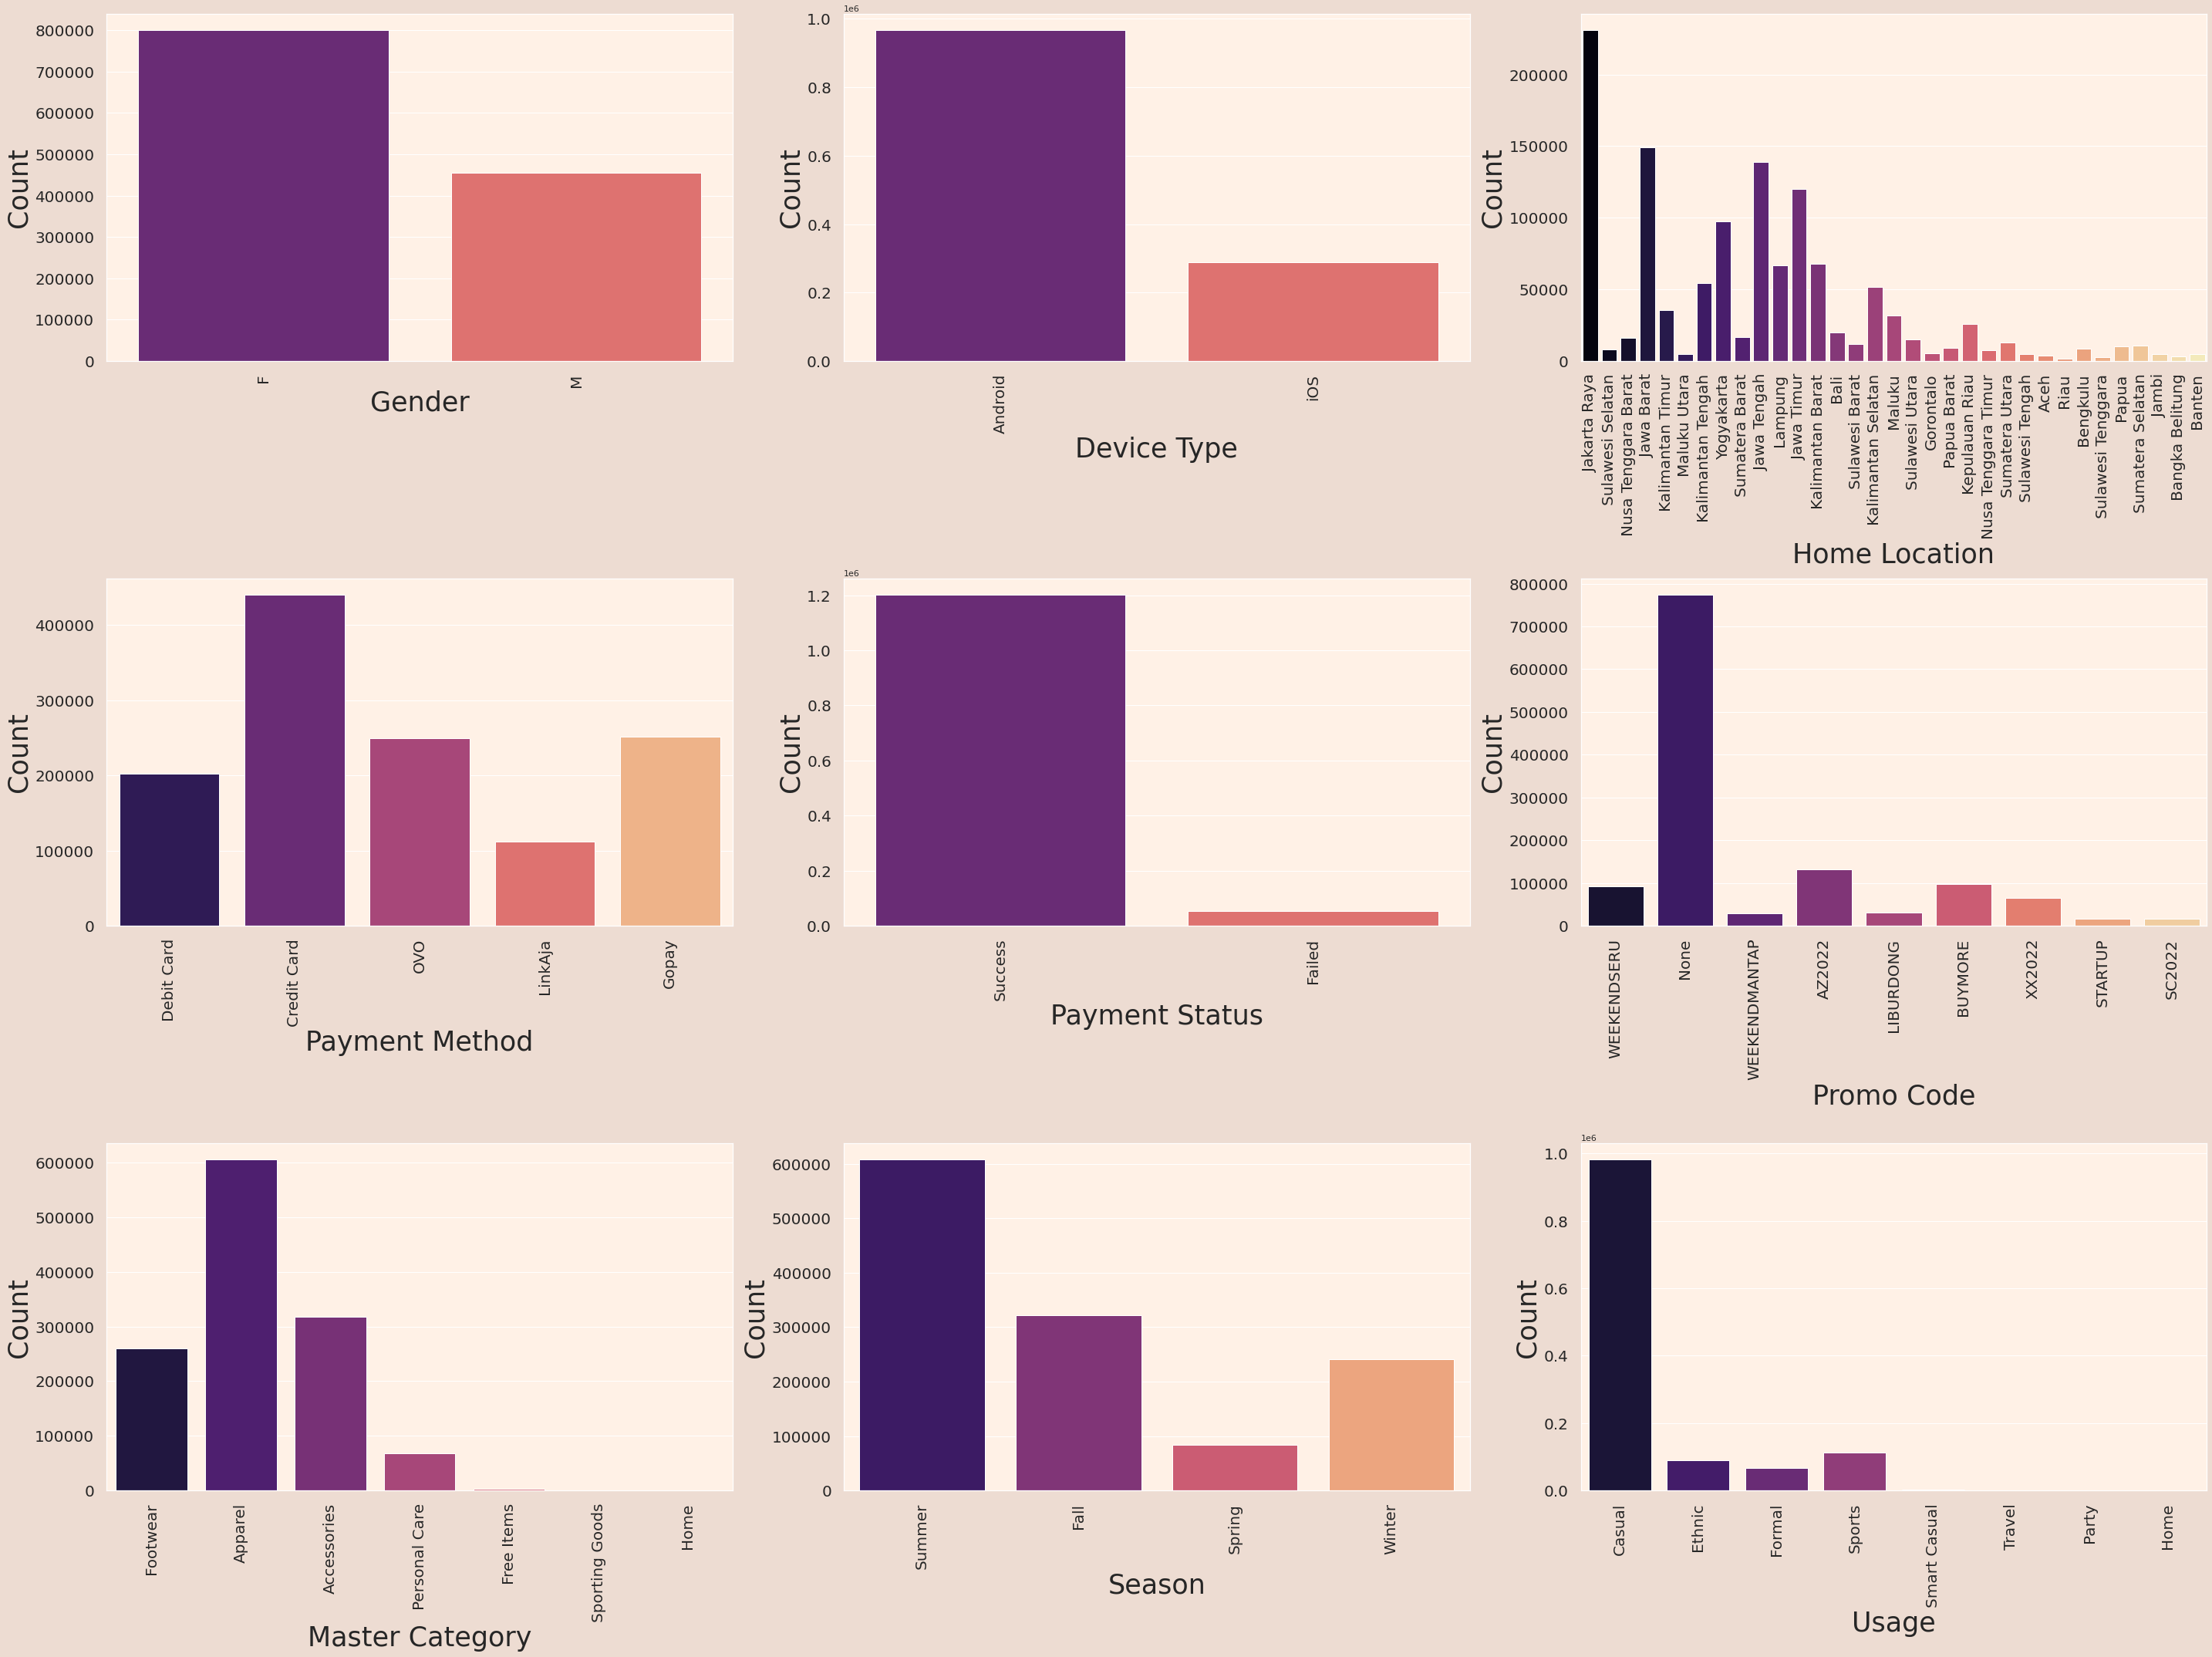

In [ ]:
categorical_columns = ['Gender',
                       'Device Type',
                       'Home Location',
                       'Payment Method',
                       'Payment Status',
                       'Promo Code',
                       'Master Category',
                       'Season',
                       'Usage']

plt.figure(figsize = (40,30))
for i in range(0, len(categorical_columns)):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(x=cleaned_dataset[categorical_columns[i]], palette='magma', orient='h')
    # ax.bar_label(ax.containers[0])
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(ylabel='Count',fontsize=35)
    plt.xlabel(xlabel=categorical_columns[i],fontsize=35)

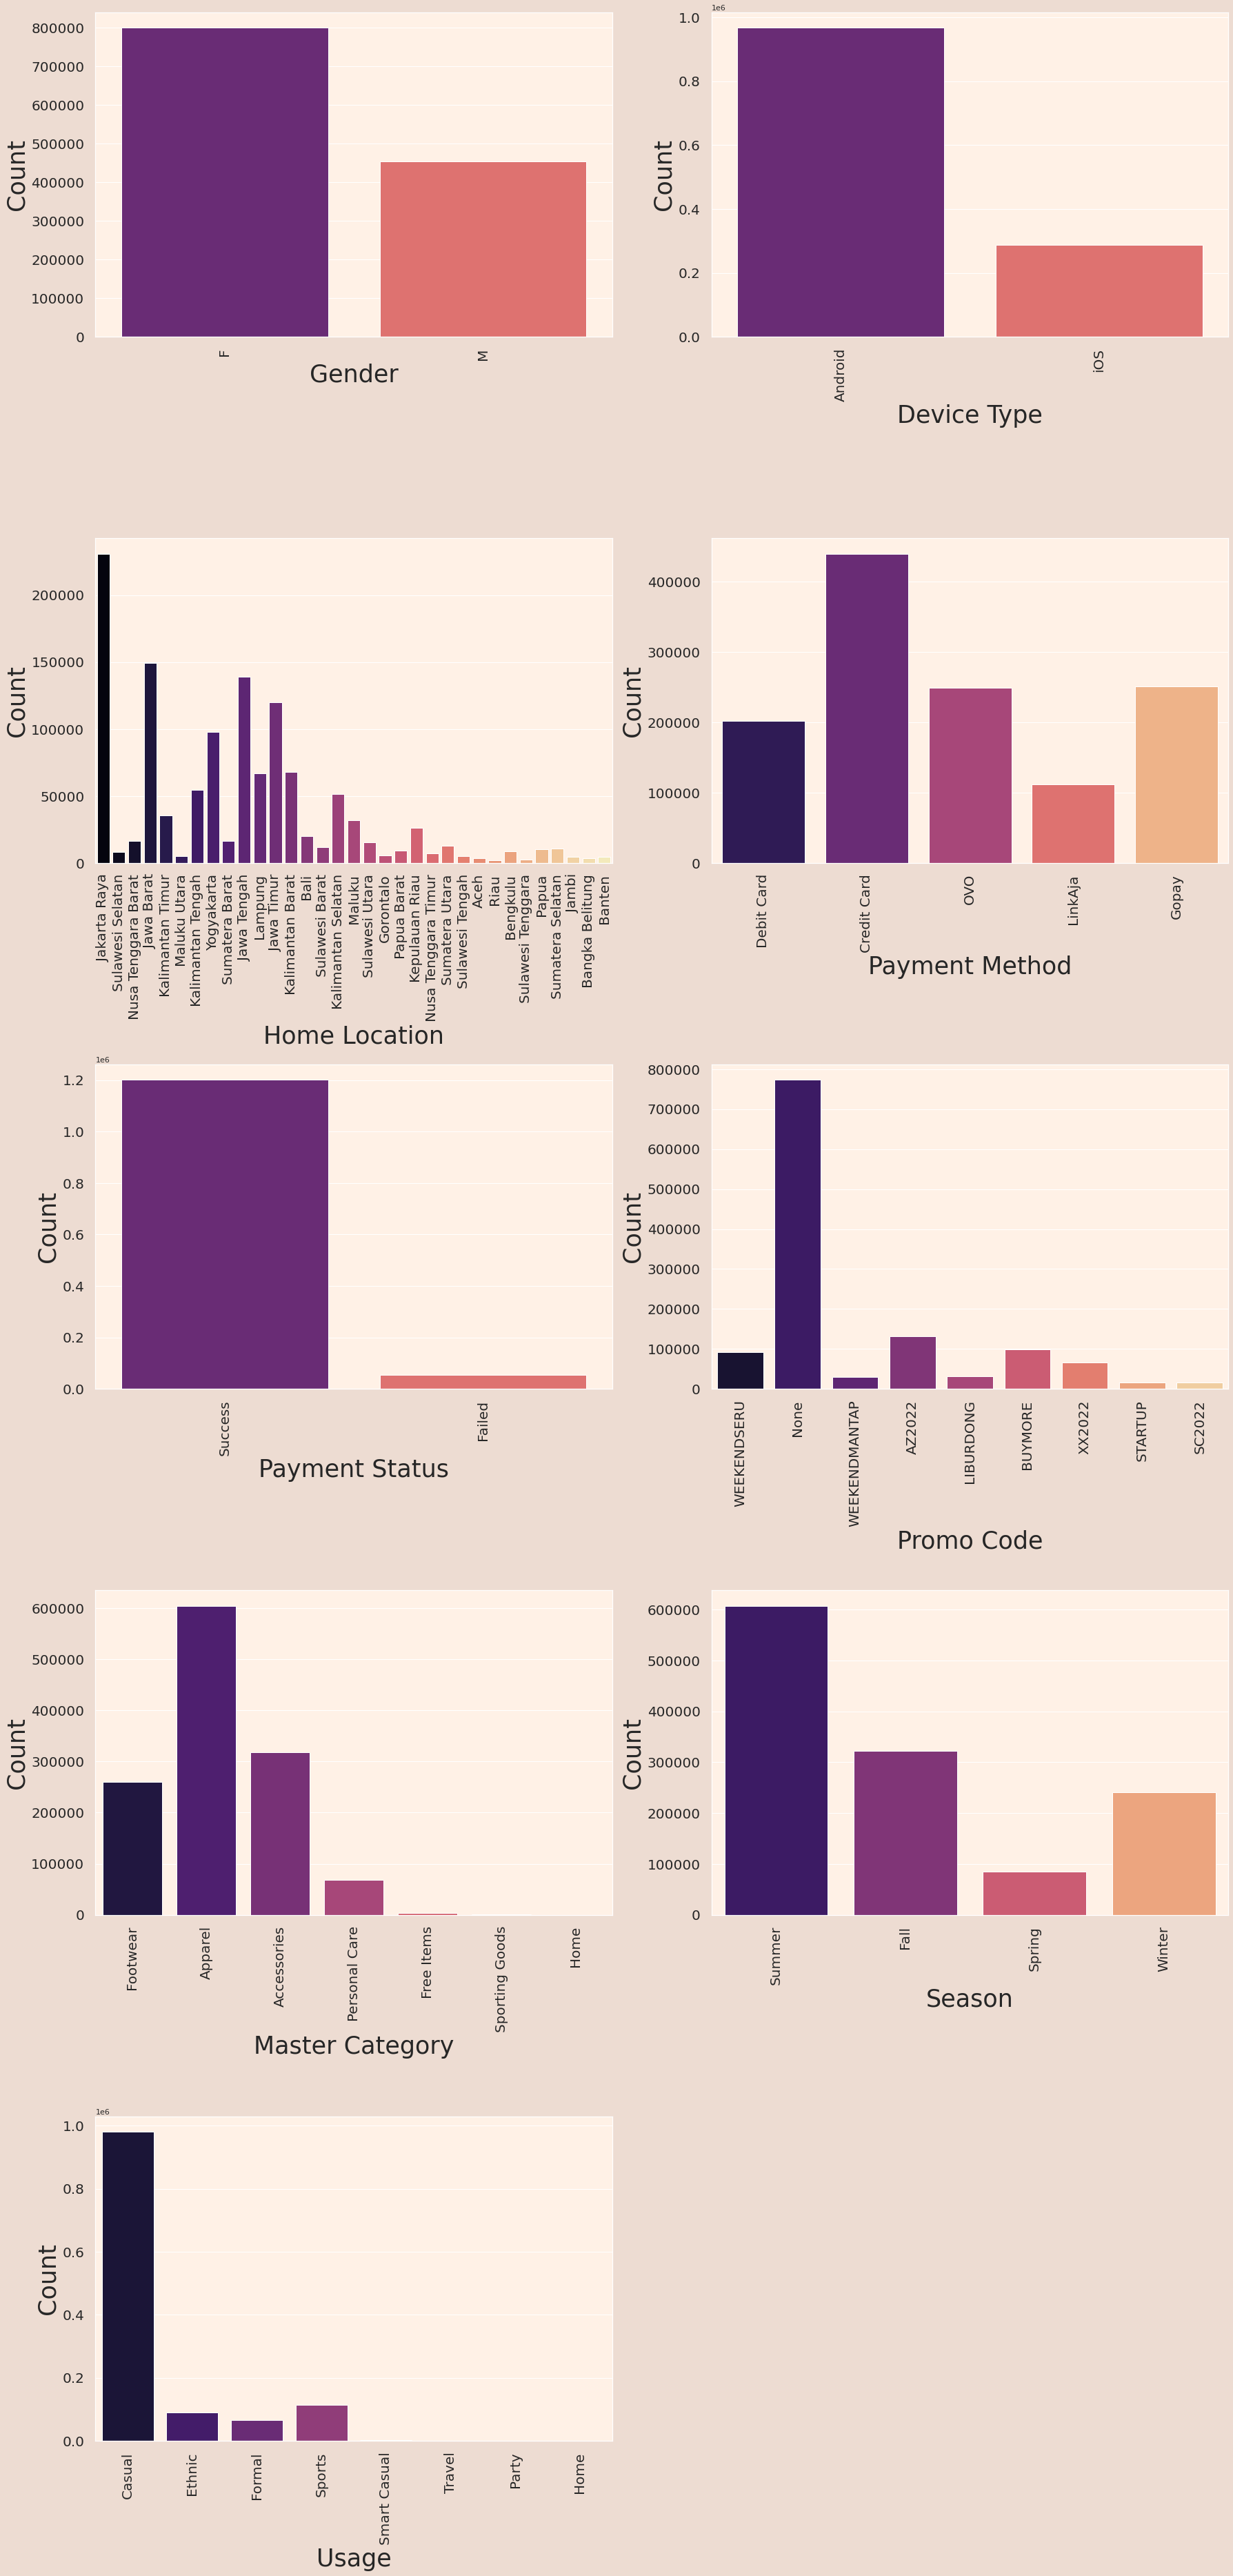

In [ ]:
categorical_columns = ['Gender',
                       'Device Type',
                       'Home Location',
                       'Payment Method',
                       'Payment Status',
                       'Promo Code',
                       'Master Category',
                       'Season',
                       'Usage']

plt.figure(figsize = (25,50))
for i in range(0, len(categorical_columns)):
    plt.subplot(5, 2, i+1)
    ax = sns.countplot(x=cleaned_dataset[categorical_columns[i]], palette='magma', orient='h')
    # ax.bar_label(ax.containers[0])
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(ylabel='Count',fontsize=35)
    plt.xlabel(xlabel=categorical_columns[i],fontsize=35)


> Insight:
* Perempuan lebih banyak melakukan transaksi dibandingkan Laki-Laki
* Pengguna Android lebih banyak dibandingkan iOS
* Domisili pelanggan peringkat satu diraih oleh Jakarta, disusul oleh Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta. Ternyata peminat tertinggi berada di pulau Jawa (Djawa adalah Koentji 🔑? )
* Metode Pembayaran paling banyak menggunakan Kartu Kredit
* Pelanggan lebih banyak melakukan transaksi tanpa menggunakan Kode Promo. Apakah karena promo nya tidak terlalu berpengaruh seperti yang sudah dibahas tadi(?)....hmmm 🤔
* Produk yang paling diminati adalah Pakaian, disusul Aksesoris, dan Alas Kaki.
* Transaksi paling banyak dilakukan pada musim Panas, disusul musim Gugur, musim Dingin dan musim Semi. Tapi bukannya Indonesia hanya punya 2 musim ya, ataukah ini hanya menggunakan acuan musim global(?) 🌎
* Produk yang dibeli pelanggan paling popular adalah untuk keperluan santai 🏝

## Bivariate

### Distribusi Penjualan 

In [ ]:
df_date = cleaned_dataset[['Customer ID','Created At']].groupby(by='Created At').count().reset_index()
df_date

,Created At,Customer ID
0,2016-06-30,1
1,2016-07-01,4
2,2016-07-02,5
3,2016-07-03,9
4,2016-07-04,16
...,...,...
2218,2022-07-27,990
2219,2022-07-28,844
2220,2022-07-29,715
2221,2022-07-30,883


In [ ]:
data_train = cleaned_dataset.set_index('Created At')
data_by_month = data_train.resample('A').count()
time = data_by_month.index.values

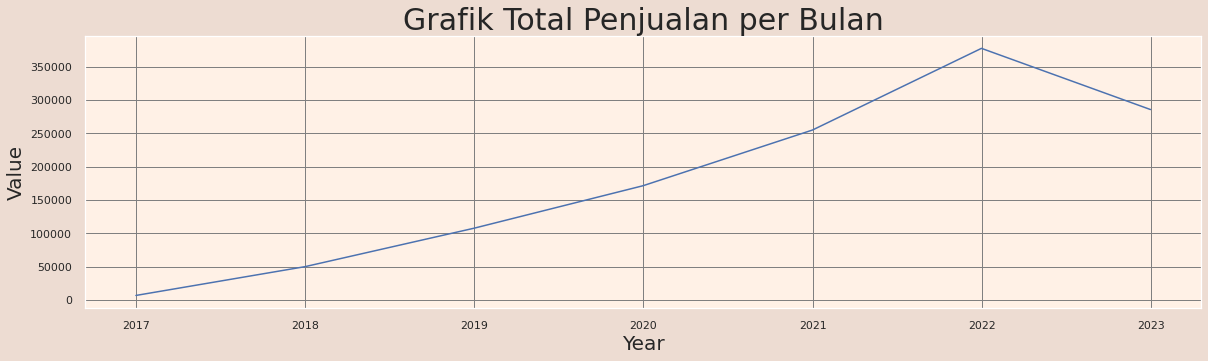

In [ ]:
time = data_by_month.index.values
test = data_by_month['Customer ID'].values

plt.figure(figsize=(20,5))
plt.plot(time, test)
plt.title('Grafik Total Penjualan per Bulan', fontsize = 30)
plt.ylabel('Value', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.grid(color='grey')

In [ ]:
df_year = cleaned_dataset[['Customer ID','Created At']].copy()
df_year['year'] = df_year['Created At'].dt.year  # extracting year
df_year.head()

,Customer ID,Created At,year
0,5868,2018-07-29,2018
1,4774,2018-07-30,2018
2,4774,2018-09-15,2018
3,4774,2018-11-01,2018
4,4774,2018-12-18,2018


In [ ]:
df_year = df_year[['Customer ID','year']].groupby(by='year').count().reset_index()
df_year

,year,Customer ID
0,2016,7039
1,2017,50171
2,2018,107789
3,2019,171472
4,2020,254983
5,2021,377427
6,2022,285704


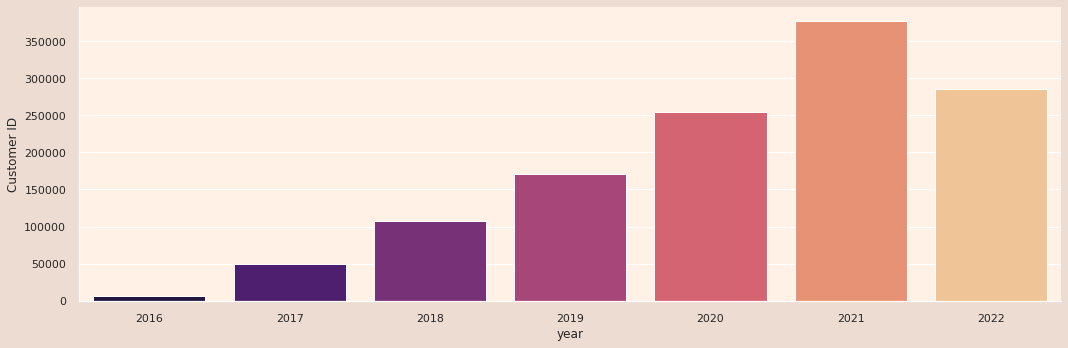

In [ ]:
sns.catplot(x='year',y='Customer ID',data=df_year,kind='bar',aspect=3, palette='magma')
plt.show()

## Multivariate

### Korelasi Antarkolom Numerikal

In [ ]:
cleaned_dataset['Year'] = cleaned_dataset['Year'].astype(str)

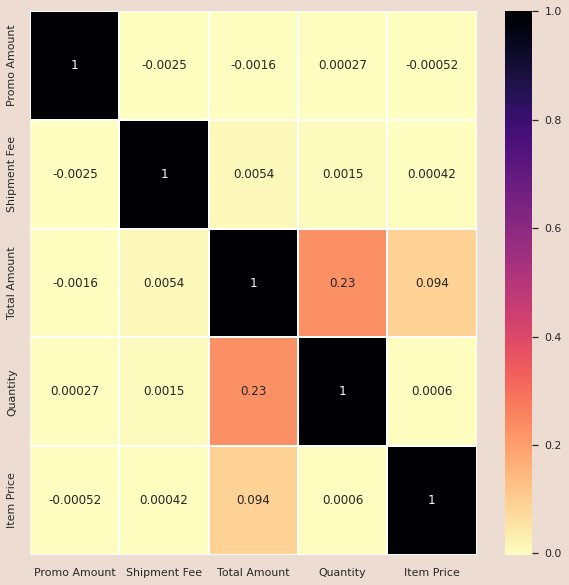

In [ ]:
corrmat= cleaned_dataset.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, linewidth=1, cmap='magma_r')

> Insight
* Tidak terdapat kolom yang memiliki korelasi kuat satu dengan lainnya

### Total Belanja per Tahun berdasarkan Gender

In [ ]:
cleaned_dataset2 = cleaned_dataset
cleaned_dataset2['Created At'] = cleaned_dataset2['Created At'].dt.strftime('%Y')

Text(0, 0.5, 'Total Amount')

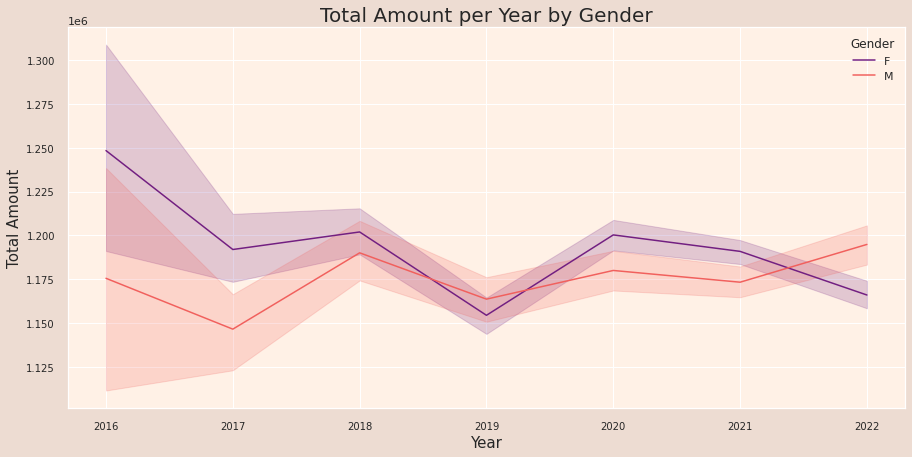

In [ ]:
cleaned_dataset2['Created At'] = cleaned_dataset2['Created At'].astype(int)

plt.figure(figsize=(15,7))
sns.lineplot(
    x='Created At', 
    y='Total Amount',
    data=cleaned_dataset2,
    palette='magma',
    hue='Gender')
plt.title('Total Amount per Year by Gender', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)

> Insight
* Total belanja pelanggan Perempuan 👩🏻 lebih mendominasi, terutama pada tahun 2016 - 2018, serta pada tahun 2020 & 2021
* Untuk Laki-Laki 👨🏻 Total Belanja lebih unggul sedikit pada tahun 2019 & 2022

### Jumlah Pesanan tiap Kategori Produk berdasarkan Jenis Kelamin

Text(0, 0.5, 'Quantity')

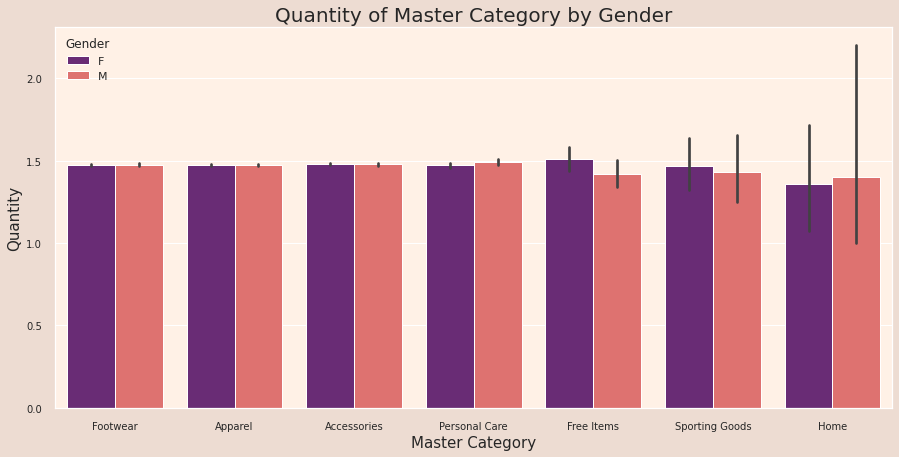

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(
    x='Master Category', 
    y='Quantity', 
    data=cleaned_dataset,
    palette='magma',
    hue='Gender')
plt.title('Quantity of Master Category by Gender', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Master Category', fontsize=15)
plt.ylabel('Quantity', fontsize=15)

> Insight
* Jumlah pembelian suatu produk berdasarkan kategorinya tidak dipengaruhi oleh jenis kelamin Pelanggan, pembelian produk berdasarkan kategori relatif seimbang antara Perempuan dan Laki-Laki, kecuali pada pada kategori yang memiliki transaksi pembelian sedikit pada grafik sebelumnya (`Free Items`, `Sporting Goods`, `Home`)

### Hubungan antara Ongkos Kirim dengan Kode Promo berdasarkan Jenis Kelamin

Text(30.37856623931623, 0.5, 'Shipment Fee')

<Figure size 1080x504 with 0 Axes>

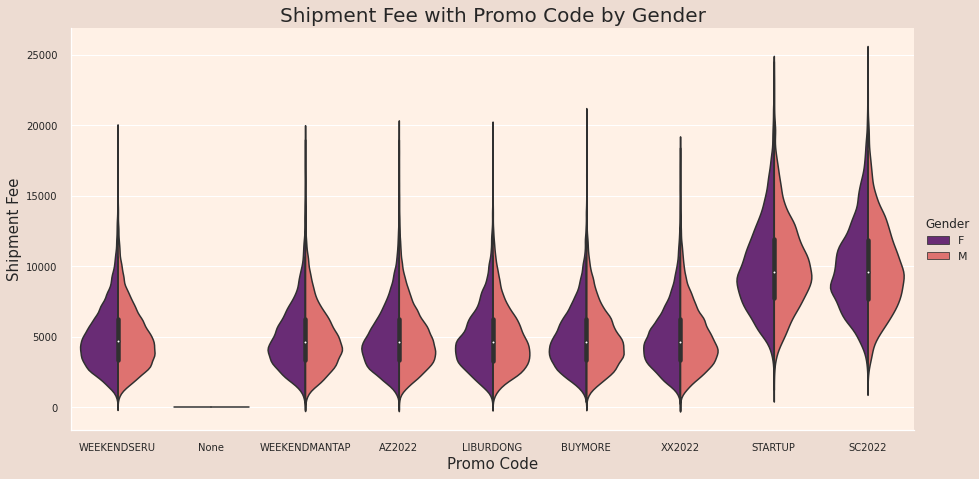

In [ ]:
plt.figure(figsize=(15,7))
sns.catplot(
    x='Promo Code', 
    y='Promo Amount',
    data=cleaned_dataset,
    palette='magma',
    split=True,
    height=6.5,
    aspect=2,
    kind='violin',
    hue='Gender')
plt.title('Shipment Fee with Promo Code by Gender', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Promo Code', fontsize=15)
plt.ylabel('Shipment Fee', fontsize=15)

> Insight
* Terdapat 2 buah Kode Promo yang masih memilki rata-rata biaya ongkos kirim 10.000, atau 2x lipatnya dari Kode Promo yang lain yaitu 5000. Penggunaan Kode Promo juga relatif seimbang antara Perempuan dan Laki-Laki

### Distribusi antara Harga Produk dengan Jumlah Pesanan berdasarkan Kategori Produk

Text(0, 0.5, 'Item Price')

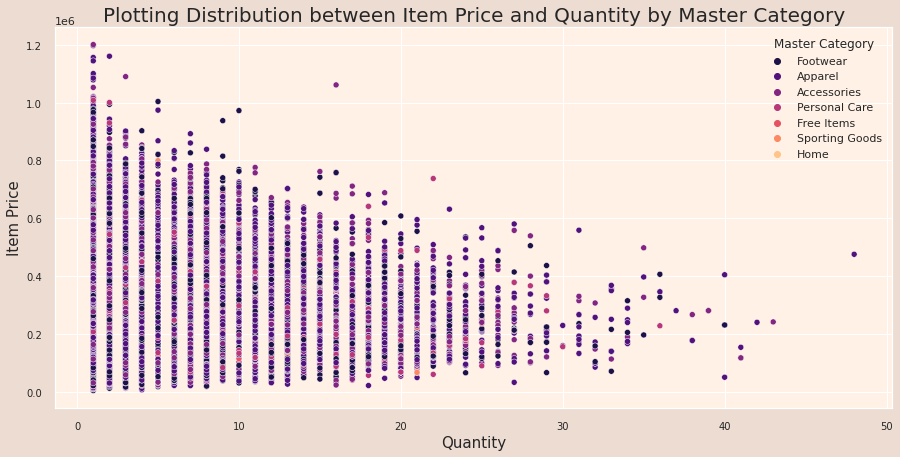

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(
    x='Quantity',
    y='Item Price',
    data=cleaned_dataset,
    palette='magma',
    hue='Master Category')
plt.title('Plotting Distribution between Item Price and Quantity by Master Category', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('Item Price', fontsize=15)

> Insight
* Terlihat bahwa semakin mahal harga produk yang dibeli semakin sedikit pula jumlah yang di pesan oleh pelanggan, begitu pun sebaliknya semakin banyak jumlah yang di pesan oleh pelanggan semakin murah pula harga produk nya (Korelasi Negatif)

### Hubungan Ongkos Kirim dan Kategori Produk berdasarkan Musim

Text(0, 0.5, 'Shipment Fee')

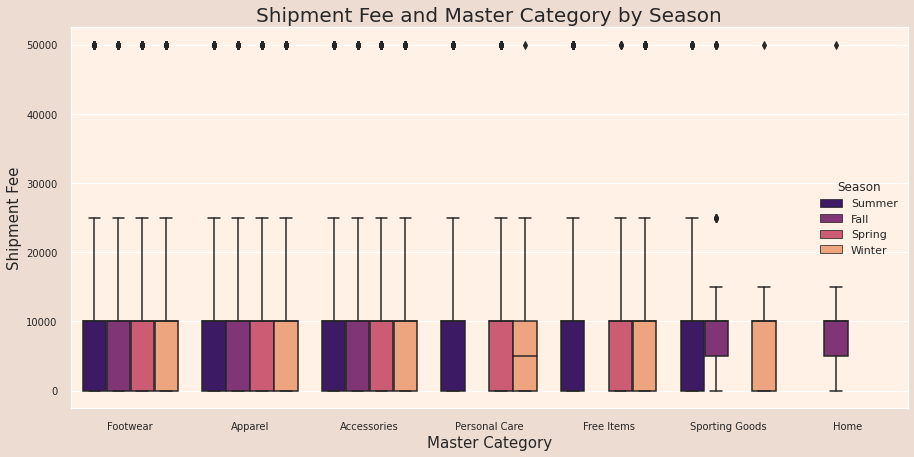

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(
    x='Master Category', 
    y='Shipment Fee',
    data=cleaned_dataset,
    palette='magma',
    hue='Season')
plt.title('Shipment Fee and Master Category by Season', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Master Category', fontsize=15)
plt.ylabel('Shipment Fee', fontsize=15)

> Insight
* Biaya ongkos kirim pada tiap musim relatif sama yaitu memiliki Interquartile antara 0 - 25.000, walaupun terdapat juga beberapa biaya ongkos kirim sebesar 50.000 (Outlier). Terdapat juga beberapa kategori produk yang tidak dibeli pada musim-musim tertentu, contohnya tidak ada pembelian kategori produk Personal Care pada musim Gugur, atau kategori produk Home hanya dibeli pada musim Gugur saja.

# Feature Engineering

## Feature Construction

### Time Benchmark

In [ ]:
fix_dataset = cleaned_dataset.copy()

In [ ]:
from datetime import datetime, date
current_time = date.today()
current_time = pd.to_datetime(current_time)
current_time

Timestamp('2022-12-06 00:00:00')

### Age

In [ ]:
fix_dataset['Age'] = current_time - fix_dataset['Birthday']
fix_dataset['Age'] = round(fix_dataset['Age'] / np.timedelta64(1, "Y")).astype(int)

### Last Purchased

In [ ]:
last_purchased = fix_dataset.groupby('Customer ID')['Created At'].max().reset_index()
last_purchased = last_purchased.rename({'Created At':'Last Purchased'},axis = 1)
fix_dataset = fix_dataset.merge(last_purchased, on = 'Customer ID')

### Duration

In [ ]:
import datetime as dt
fix_dataset['Duration'] = (fix_dataset['Last Purchased'] - fix_dataset['First Join Date']).dt.days

TypeError: ignored

### Recency

In [ ]:
recency = fix_dataset['Created At'].max()
fix_dataset['Recency'] = (recency - fix_dataset['Created At']).dt.days

### Frequency

In [ ]:
customer_repurchase = fix_dataset[['Created At','Customer ID']].groupby('Customer ID').count()
customer_repurchase.rename(columns={'Created At':'Frequency'}, inplace=True)
fix_dataset = fix_dataset.merge(customer_repurchase, how='left', on = 'Customer ID')

### Monetary

In [ ]:
total_purchase = fix_dataset.groupby('Customer ID')['Total Amount'].sum().reset_index()
total_purchase = total_purchase.rename({'Total Amount':'Monetary'},axis = 1)
fix_dataset = fix_dataset.merge(total_purchase, on = 'Customer ID')

### Total Item

In [ ]:
total_quantity = fix_dataset.groupby('Customer ID')['Quantity'].sum().reset_index()
total_quantity = total_quantity.rename({'Quantity':'Total Item'},axis = 1)
fix_dataset = fix_dataset.merge(total_quantity, on = 'Customer ID')

### Total Promo Amount

In [ ]:
promo_amount = fix_dataset[['Promo Amount','Customer ID']].groupby('Customer ID').sum()
promo_amount.rename(columns={'Promo Amount':'Total Promo Amount'}, inplace=True)
fix_dataset = fix_dataset.merge(promo_amount, on = 'Customer ID')

### Total Promo Code Used

In [ ]:
customer_promo = fix_dataset[['Promo Code','Customer ID']].groupby('Customer ID').count()
customer_promo.rename(columns={'Promo Code':'Total Promo Code Used'}, inplace=True)
fix_dataset = fix_dataset.merge(customer_promo, on = 'Customer ID')

### Main Payment Method

In [ ]:
main_payment = fix_dataset[['Customer ID', 'Payment Method']].groupby('Customer ID').agg(pd.Series.mode)
main_payment.rename(columns={'Payment Method':'Main Payment Method'}, inplace=True)
fix_dataset = fix_dataset.merge(main_payment, how='left', on = 'Customer ID')

### Estimated Delivery

In [ ]:
fix_dataset['Estimated Delivery'] = fix_dataset['Shipment Date Limit'] - fix_dataset['Created At']
fix_dataset['Estimated Delivery'] = round(fix_dataset['Estimated Delivery'] / np.timedelta64(1, "D")).astype(int)

### Max Shipping

In [ ]:
max_shipping = fix_dataset.groupby('Customer ID')['Estimated Delivery'].max().reset_index()
max_shipping = max_shipping.rename({'Estimated Delivery':'Max Shipping'},axis = 1)
fix_dataset = fix_dataset.merge(max_shipping, how='left', on = 'Customer ID')

### Main Location

In [ ]:
def main_location(x):
    if (x == 'Jakarta Raya' or
        x == 'Jawa Barat' or
        x == 'Jawa Tengah' or
        x == 'Jawa Timur' or
        x == 'Yogyakarta' or
        x == 'Banten'):
      return 'Pulau Jawa'
    else:
      return 'Luar Pulau Jawa'

fix_dataset['Main Location'] = fix_dataset['Home Location'].apply(lambda x: main_location(x))

### **IS CHURN**

In [ ]:
fix_dataset['Is Churn'] = fix_dataset['Recency'].apply(lambda x: True if x >= 365 else False)

In [ ]:
fix_dataset['Is Churn'].value_counts()

In [ ]:
fix_dataset.head(3)

### Reduce Dataset

In [ ]:
reduced_dataset = fix_dataset.drop_duplicates(subset='Customer ID', keep='last')
reduced_dataset = reduced_dataset.reset_index(drop=True)

In [ ]:
reduced_dataset = reduced_dataset.drop('Main Payment Method', axis=1)

In [ ]:
# reduced_dataset.to_csv('reduced_dataset.csv', index=False)

In [ ]:
reduced_dataset.head(3)

In [ ]:
reduced_dataset.info()

In [ ]:
for col in reduced_dataset:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(reduced_dataset[col].value_counts(), '\n')

### **CHURN Analysis**

#### Churn Persentage

In [ ]:
reduced_dataset['Is Churn'].value_counts()

False    38239
True     12466
Name: Is Churn, dtype: int64

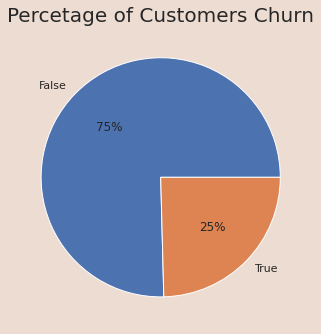

In [ ]:
fig, ax = plt.subplots()
labels = ['False','True']
churn = reduced_dataset['Is Churn'].value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percetage of Customers Churn', fontsize=20)
plt.show()

#### Categorical

In [ ]:
cat_cols = ['Gender',
            'Device Type',
            'Payment Method',
            'Promo Code',
            'Master Category',
            'Season',
            'Year',
            'Usage',
            'Main Location']

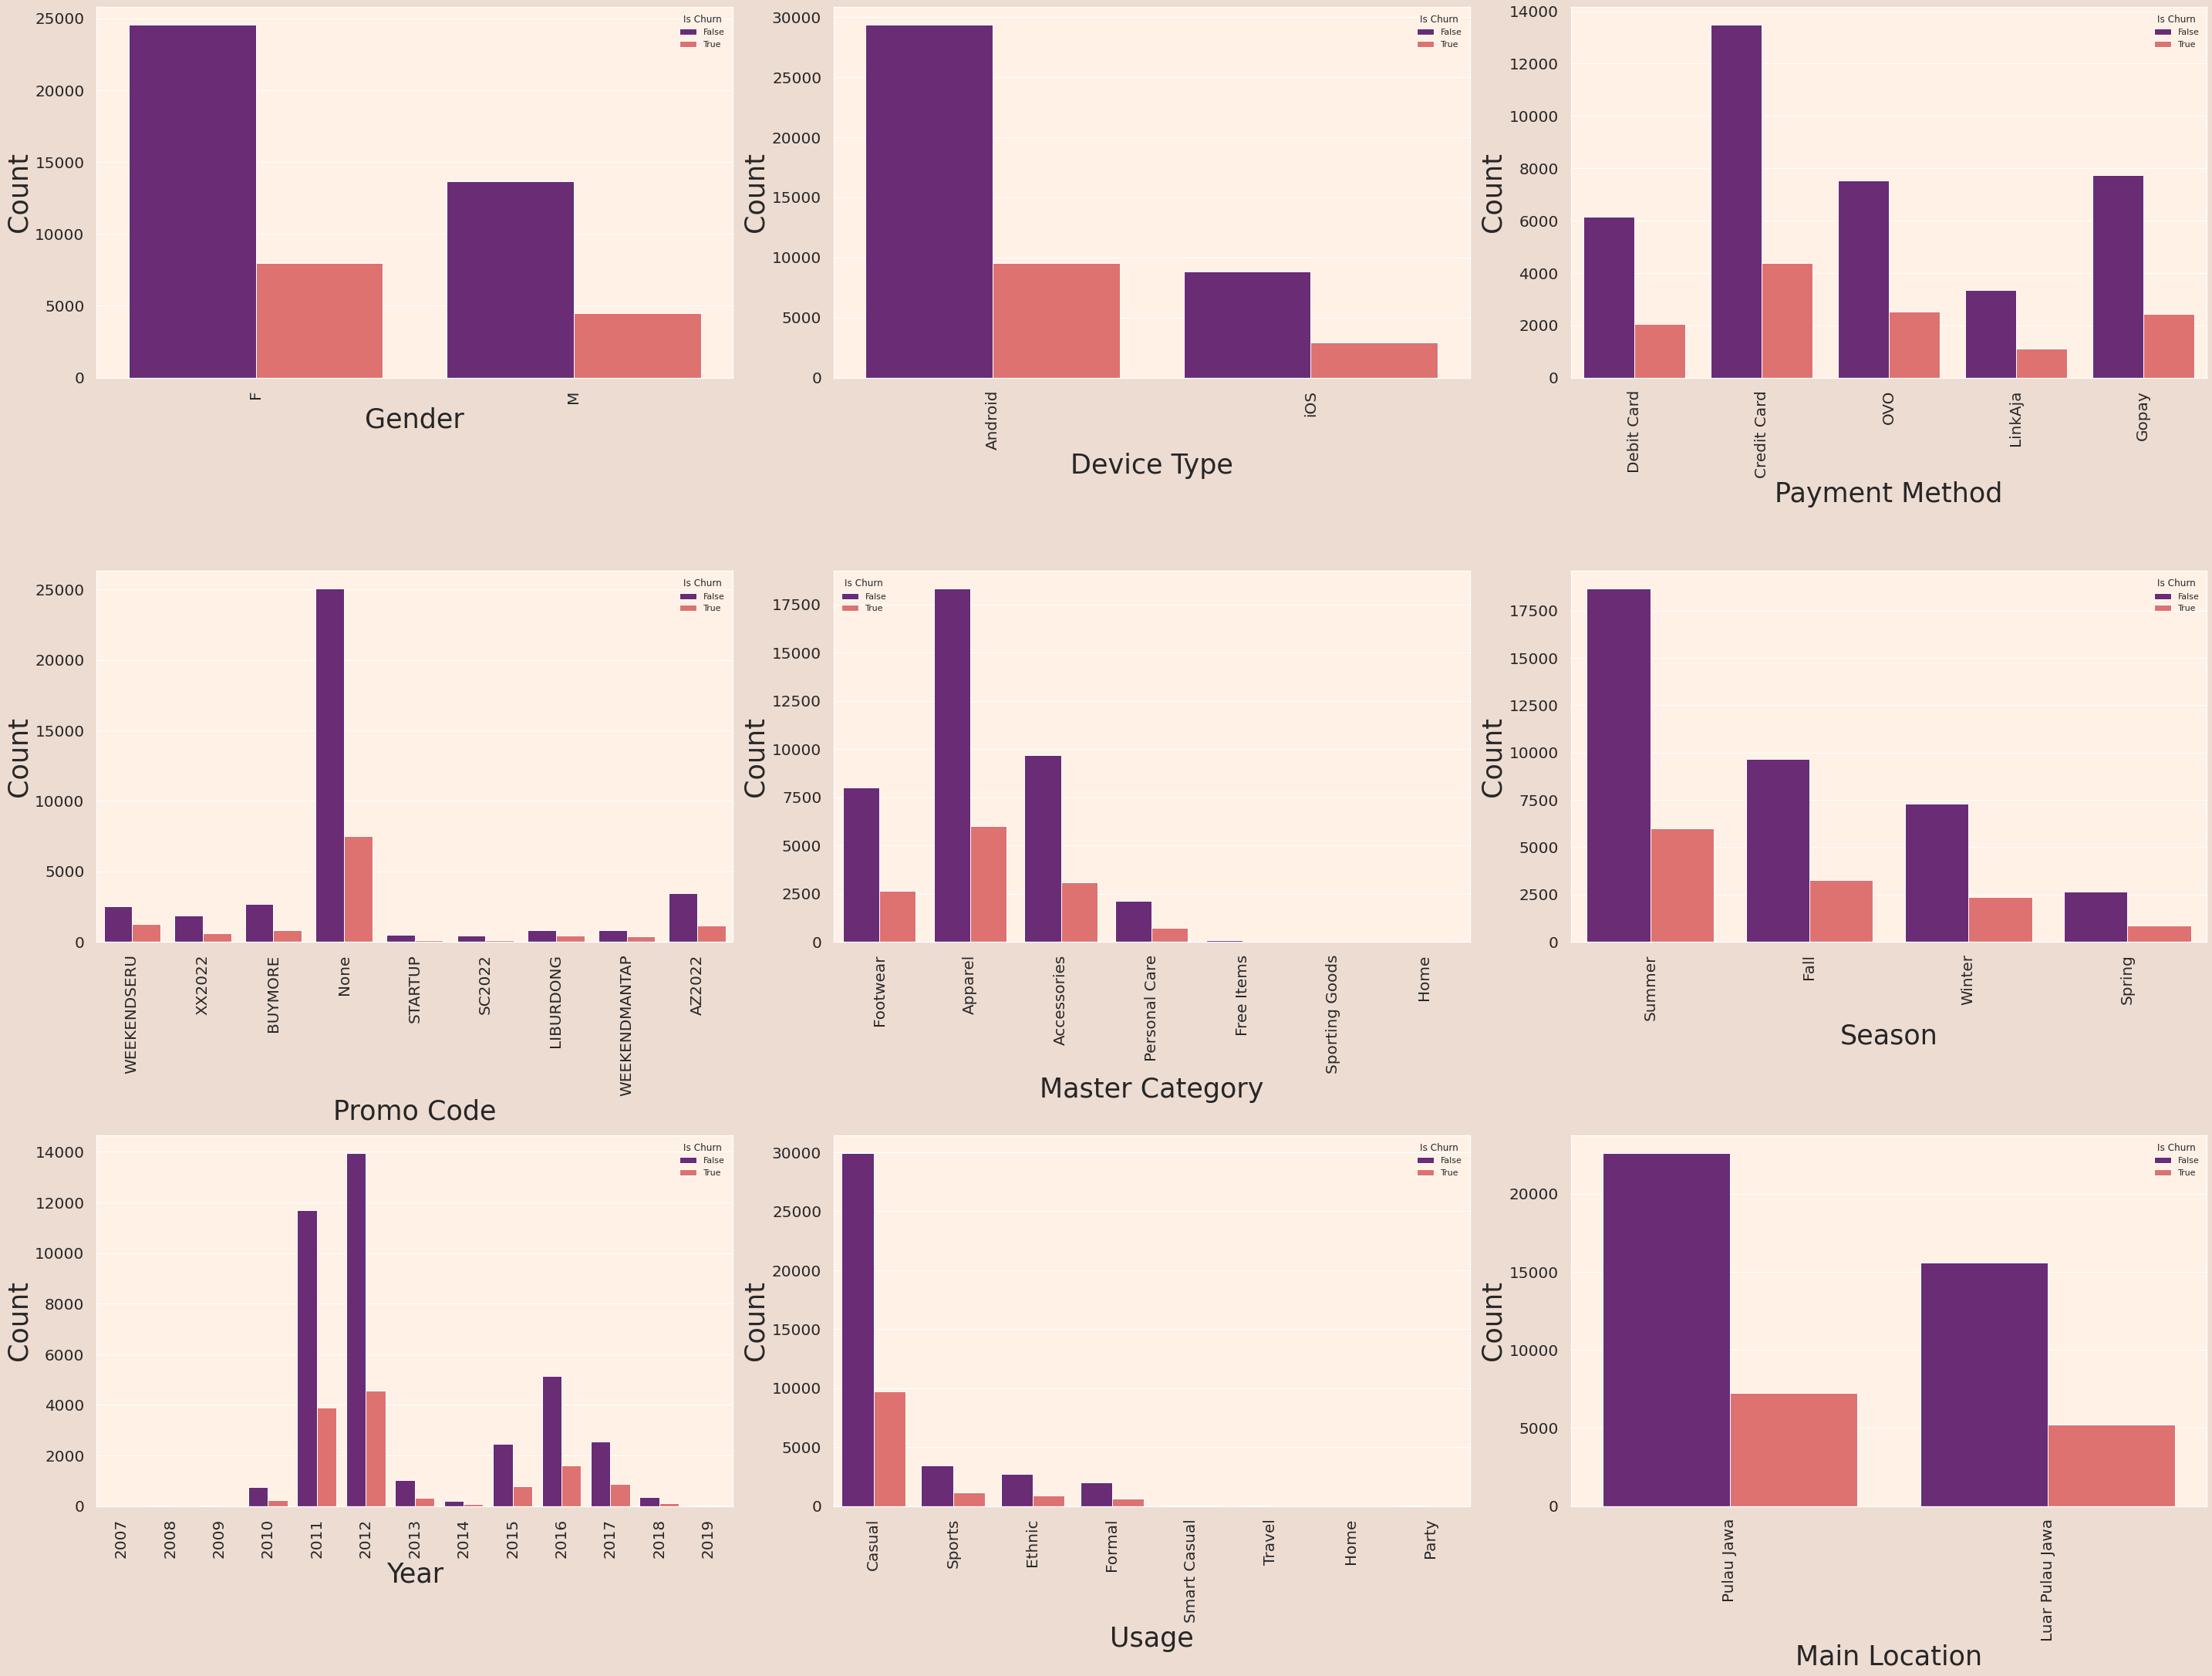

In [ ]:
plt.figure(figsize = (40,30))
for i in range(0, len(cat_cols)):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(data=reduced_dataset, x=cat_cols[i], palette='magma', orient='h', hue='Is Churn')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(ylabel='Count',fontsize=35)
    plt.xlabel(xlabel=cat_cols[i],fontsize=35)

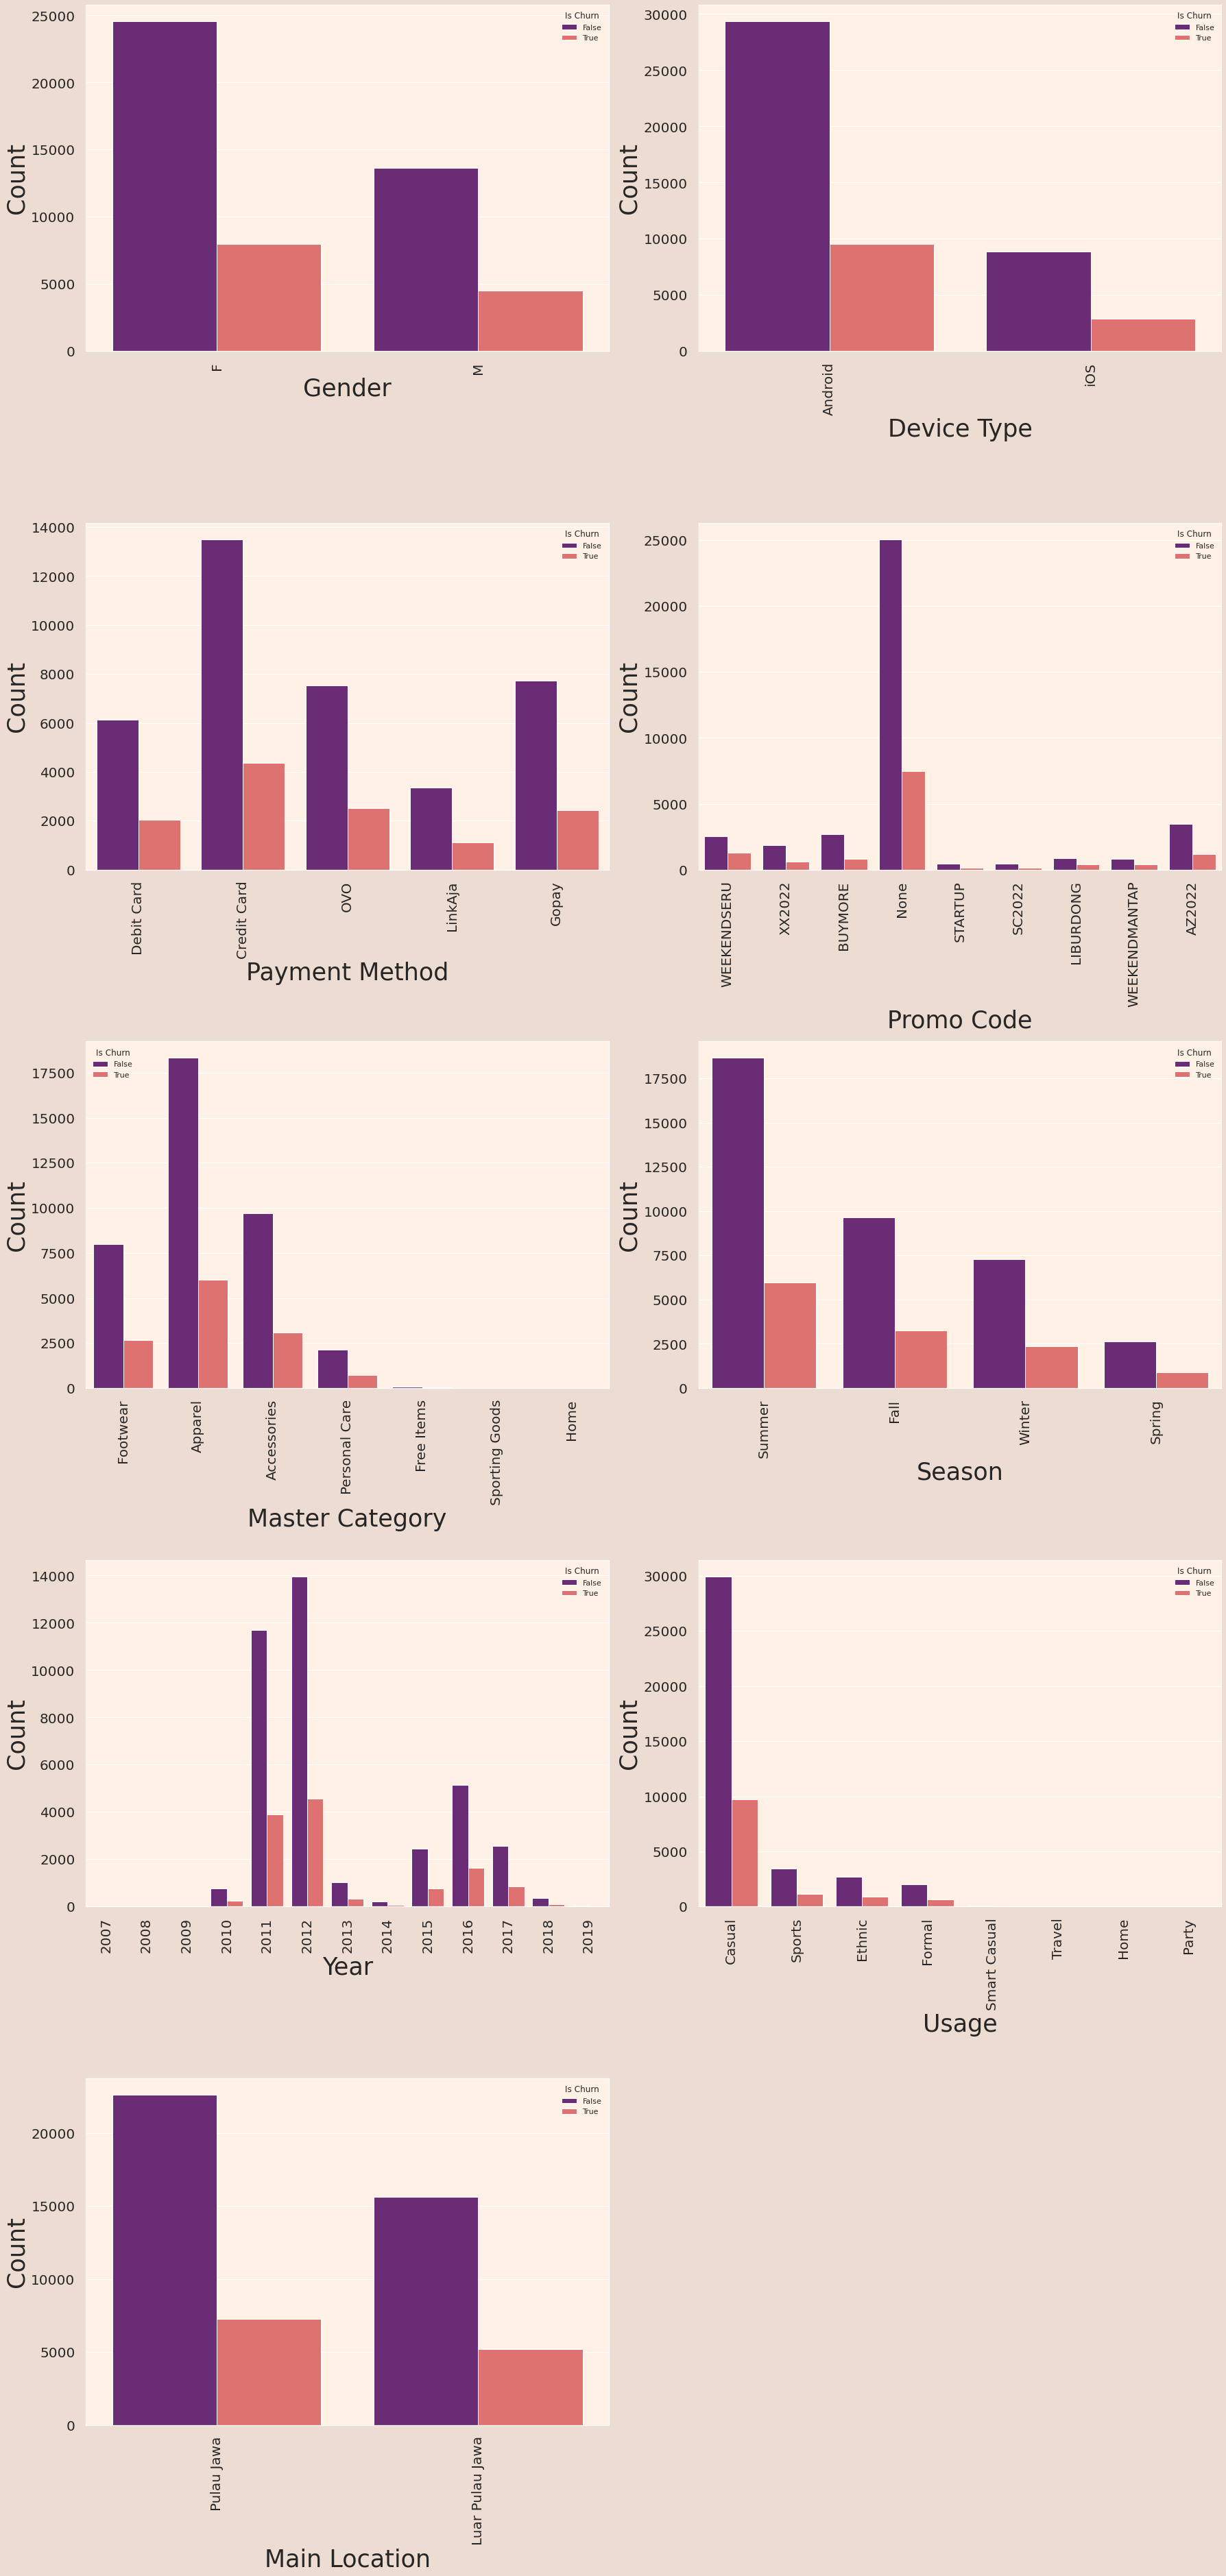

In [ ]:
plt.figure(figsize = (25,50))
for i in range(0, len(cat_cols)):
    plt.subplot(5, 2, i+1)
    ax = sns.countplot(data=reduced_dataset, x=cat_cols[i], palette='magma', orient='h', hue='Is Churn')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(ylabel='Count',fontsize=35)
    plt.xlabel(xlabel=cat_cols[i],fontsize=35)

> Insight
* Bila diperhatikan dengan baik, hampir semua jumlah antara Churn 'True' dengan Churn 'False' memiliki perbandingan yang sama pada tiap sub kolom yaitu 1:3 atau Churn 'True' sekitar 30% nya dari Churn 'False'
 - Sebagai contoh pada Kolom `Gender` bahwa total Churn 'False' pada sub Kolom Male sekitar 15.000 sedangkan total Churn 'True' nya sekitar 5000, bisa dilihat bahwa perbandingan antara 'True' : 'Flase' adalah 1:3
* Tinggi atau rendahnya nilai Churn pada sub Kolom kali ini juga dipengaruhi oleh tinggi atau rendahnya transaksi pada grafik sebelumnya (Analisis Setiap Kolom Kategorikal dengan Visualisasi)
 - Sebagai contoh nilai Churn paling tinggi pada kolom `Usage` adalah sub kolom 'Casual', dimana 'Casual' sendiri pada grafik sebelumnya merupakan sub kolom yang paling tinggi nilai transaksinya

#### Numerical

In [ ]:
num_cols = ['Promo Amount',
            'Shipment Fee',
            'Total Amount',
            'Quantity',
            'Item Price',
            'Age',
            'Duration',
            'Recency',
            'Frequency',
            'Monetary',
            'Total Item',
            'Total Promo Amount',
            'Total Promo Code Used',
            'Estimated Delivery',
            'Max Shipping',
            'Is Churn']

In [ ]:
sns.pairplot(reduced_dataset[num_cols], hue='Is Churn' , palette = 'magma')
plt.show()

> Insight
* Berdasarkan grafik diatas, pada kolom `Recency` terlihat jelas batas antara Churn `True` dan Churn `False`. Semakin tinggi angka `Recency`, maka semakin besar pula bahwa pelanggan itu dinyatakan Churn. Hal ini karena kolom Churn sendiri merupakan hasil Feature Engineering dari kolom `Recency`
* Churn `True` juga terlihat jelas pada kolom `Frequency`, `Monetary`, `Total Item`, `Total Promo Amount`, dan `Total Promo Code Used`. Semakin rendah nilai mereka semakin banyak didapatkan Churn `True`
* Terdapat beberapa kolom yang memiliki Korelasi Positif antara `Frequency`, `Monetary`, `Total Item`, dan `Total Promo Amount`

## Feature Selection

In [ ]:
reduced_dataset = pd.read_csv('/content/drive/MyDrive/startupcampus/reduced_dataset.csv')

In [ ]:
reduced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  50705 non-null  int64  
 1   First Name                   50705 non-null  object 
 2   Last Name                    50705 non-null  object 
 3   Username                     50705 non-null  object 
 4   Email                        50705 non-null  object 
 5   Gender                       50705 non-null  object 
 6   Birthday                     50705 non-null  object 
 7   Device Type                  50705 non-null  object 
 8   Device ID                    50705 non-null  object 
 9   Device Version               50705 non-null  object 
 10  Home Location Latitude       50705 non-null  float64
 11  Home Location Longitude      50705 non-null  float64
 12  Home Location                50705 non-null  object 
 13  Home Country    

In [ ]:
reduced_dataset.head(3)

,Customer ID,First Name,Last Name,Username,Email,Gender,Birthday,Device Type,Device ID,Device Version,Home Location Latitude,Home Location Longitude,Home Location,Home Country,First Join Date,Created At,Booking ID,Session ID,Payment Method,Payment Status,Promo Amount,Promo Code,Shipment Fee,Shipment Date Limit,Shipment Location Latitude,Shipment Location Longitude,Total Amount,Product ID,Quantity,Item Price,Master Category,Sub Category,Article Type,Base Colour,Season,Year,Usage,Product Display Name,Age,Last Purchased,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping,Main Location,Is Churn
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03,-8.227893,111.969107,199832,54728,1,191247,Footwear,Shoes,Casual Shoes,Black,Summer,2012,Casual,Vans Men Black Shoes,22,2018-07-29,1,1463,1,199832,1,1415,1,5,5,Pulau Jawa,True
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2022-06-09,7ab6eac3-ff92-46d7-9030-296301ee920a,1688279e-d03f-466a-a20e-57846de4c179,Credit Card,Success,3329,XX2022,50000,2022-06-10,0.148523,109.320337,245215,18476,1,198544,Footwear,Shoes,Casual Shoes,Yellow,Fall,2011,Casual,Puma Men Yacht Lifevest Yellow Casual Shoes,27,2022-06-09,1412,52,43,31135863,64,123186,43,1,6,Luar Pulau Jawa,False
2,58191,Hari,Hidayat,54aa95c9-9c7e-416f-822d-92f65222ee32,54aa95c9_9c7e_416f_822d_92f65222ee32@startupca...,M,2013-11-28,Android,afba5277-4bce-4fe0-ab69-7b60b85ba31a,Android 3.2.1,-8.328679,118.773797,Nusa Tenggara Barat,Indonesia,2018-07-28,2022-07-08,e03c7345-b4f9-4d0d-b53c-b039f0b2fdb8,da19c53e-6ccf-40d9-bfe1-5bb1aea42680,OVO,Success,9376,BUYMORE,10000,2022-07-12,-2.897258,120.314504,171940,6973,1,171316,Apparel,Topwear,Tshirts,Orange,Summer,2011,Casual,s.Oliver Men's California Orange T-shirt,9,2022-07-08,1441,23,152,204722927,195,205903,152,4,6,Luar Pulau Jawa,False


In [ ]:
reduced_dataset['Customer ID'] = reduced_dataset['Customer ID'].astype(str)

### Kolom Numerikal untuk Clustering

In [ ]:
num_cols = reduced_dataset[['Customer ID',
                            'Promo Amount',
                            'Shipment Fee',
                            'Total Amount',
                            'Quantity',
                            'Item Price',
                            'Age',
                            'Duration',
                            'Recency',
                            'Frequency',
                            'Monetary',
                            'Total Item',
                            'Total Promo Amount',
                            'Total Promo Code Used',
                            'Estimated Delivery',
                            'Max Shipping']]

### Kolom Kategorikal untuk Clustering

In [ ]:
cat_cols = reduced_dataset[['Customer ID',
                            'Gender',
                            'Device Type',
                            'Payment Method',
                            'Master Category',
                            'Season',
                            'Usage',
                            'Main Location',
                            'Is Churn']]

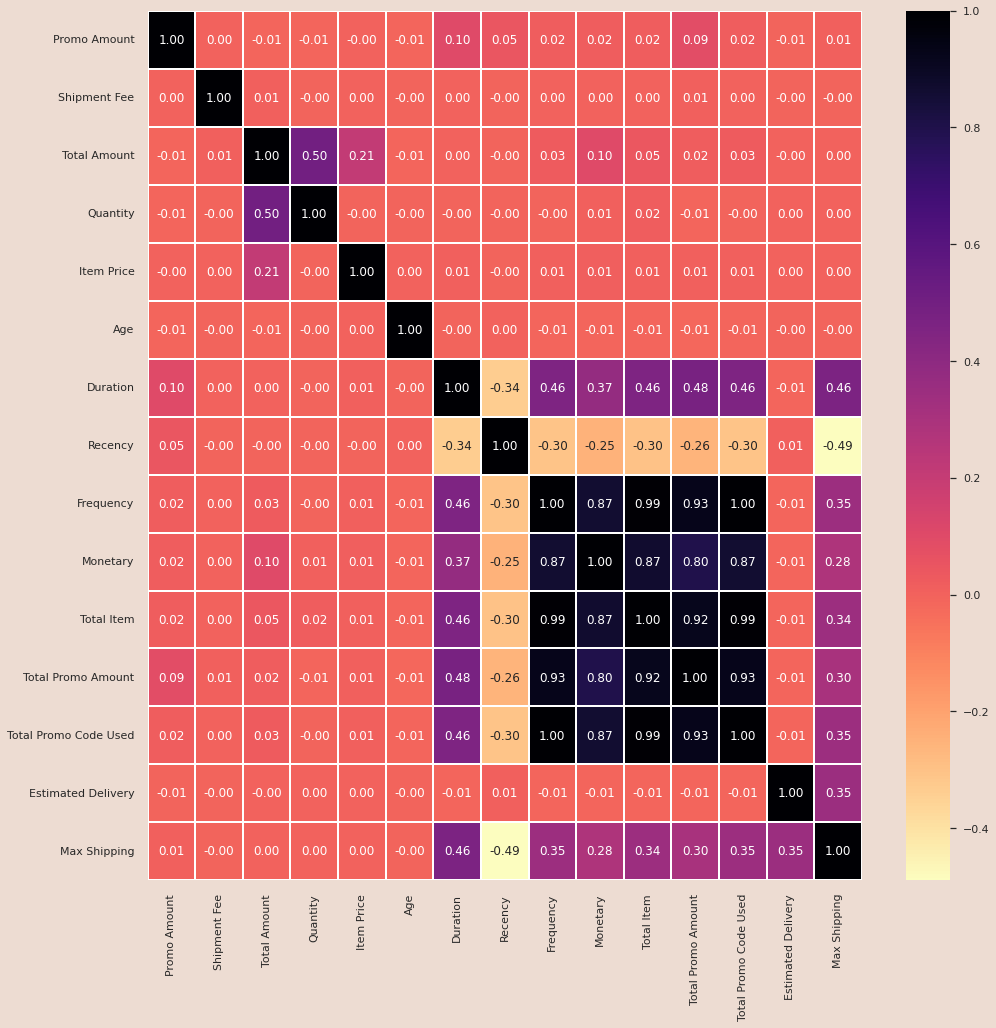

In [ ]:
corrmat = num_cols.corr()
plt.figure(figsize=(16,16))  
sns.heatmap(corrmat,annot=True, linewidth=1, cmap='magma_r', fmt='.2f')

> Insight
* Beberapa kolom memeiliki korelasi yang sangat kuat yaitu; Frequency,	Monetary,	Total Item,	Total Promo Amount,	dan Total Promo Code Used, sisanya memilki korelasi yang rendah. Kemungkin kolom yang memilki relasi tinggi adalah hasil Feature Engineering 🤨

## Feature Extraction

In [ ]:
selected_cols = num_cols.merge(cat_cols, on = 'Customer ID')

In [ ]:
selected_cols.head()

,Customer ID,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping,Gender,Device Type,Payment Method,Master Category,Season,Usage,Main Location,Is Churn
0,5868,1415,10000,199832,1,191247,22,1,1463,1,199832,1,1415,1,5,5,F,Android,Debit Card,Footwear,Summer,Casual,Pulau Jawa,True
1,4774,3329,50000,245215,1,198544,27,1412,52,43,31135863,64,123186,43,1,6,F,Android,Credit Card,Footwear,Fall,Casual,Luar Pulau Jawa,False
2,58191,9376,10000,171940,1,171316,9,1441,23,152,204722927,195,205903,152,4,6,M,Android,OVO,Apparel,Summer,Casual,Luar Pulau Jawa,False
3,81104,0,10000,195705,1,185705,28,0,1464,1,195705,1,0,1,6,6,F,Android,OVO,Apparel,Summer,Casual,Pulau Jawa,True
4,47040,0,10000,131776,1,121776,25,977,487,3,545304,3,10448,3,3,3,F,Android,LinkAja,Footwear,Summer,Casual,Luar Pulau Jawa,True


### Label Encoding

In [ ]:
selected_cols = selected_cols.drop('Customer ID', axis=1)

In [ ]:
s = (selected_cols.dtypes == 'object')
object_cols = list(s[s].index)

LE=LabelEncoder()
for i in object_cols:
    selected_cols[i]=selected_cols[[i]].apply(LE.fit_transform)

In [ ]:
selected_cols['Is Churn'] = selected_cols['Is Churn'].replace({False: 0,
                                                               True: 1})

In [ ]:
selected_cols.describe()

,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping,Gender,Device Type,Payment Method,Master Category,Season,Usage,Main Location,Is Churn
count,50705.000000,50705.000000,5.070500e+04,50705.000000,5.070500e+04,50705.000000,50705.000000,50705.000000,50705.000000,5.070500e+04,50705.000000,5.070500e+04,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000
mean,1902.156277,9256.680801,5.491925e+05,1.483779,2.496480e+05,26.881747,681.990021,299.083384,24.742826,2.923547e+07,36.498846,5.064548e+04,24.742826,3.506281,5.043487,0.358091,0.232186,1.617927,1.190159,1.612425,0.732078,0.589528,0.245853
std,2991.649393,9460.367142,8.013577e+05,1.621347,1.112070e+05,7.261970,612.757692,436.187195,44.196931,6.426486e+07,65.676967,1.053349e+05,44.196931,1.498647,1.299934,0.479444,0.422231,1.518316,1.160588,1.061565,1.751263,0.491924,0.430596
min,0.000000,0.000000,1.757300e+04,1.000000,1.760500e+04,7.000000,0.000000,0.000000,1.000000,2.745000e+04,1.000000,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.040760e+05,1.000000,1.686600e+05,22.000000,101.000000,39.000000,2.000000,9.094500e+05,3.000000,2.425000e+03,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,10000.000000,3.034400e+05,1.000000,2.333500e+05,26.000000,559.000000,110.000000,8.000000,5.144328e+06,12.000000,1.285800e+04,8.000000,4.000000,6.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000
75%,3732.000000,10000.000000,5.172310e+05,1.000000,3.134410e+05,31.000000,1133.000000,359.000000,27.000000,2.691191e+07,40.000000,5.048600e+04,27.000000,5.000000,6.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000
max,23839.000000,50000.000000,1.462553e+07,38.000000,1.018040e+06,68.000000,2217.000000,2221.000000,807.000000,1.116077e+09,1259.000000,3.022499e+06,807.000000,7.000000,7.000000,1.000000,1.000000,4.000000,6.000000,3.000000,7.000000,1.000000,1.000000


> Hasil Encode Kolom Kategorikal:
* Gender
 - `0` = Female
 - `1` = Male
* Device Type
 - `0` = Android
 - `1` = iOS
* Payment Method
 - `0` = Credit Card
 - `1` = Debit Card
 - `2` = Gopay
 - `3` = LinkAja
 - `4` = OVO
* Master Category
 - `0` = Accessories
 - `1` = Apparel
 - `2` = Footwear
 - `3` = Free Items
 - `4` = Home
 - `5` = Personal Care
 - `6` = Sporting Goods
* Season
 - `0` = Fall
 - `1` = Spring
 - `2` = Summer
 - `3` = Winter
* Usage
 - `0` = Casual 
 - `1` = Ethnic
 - `2` = Formal
 - `3` = Home
 - `4` = Party
 - `5` = Smart Casual
 - `6` = Sports
 - `7` = Travel
* Main Location
 - `0` = Luar Pulau Jawa
 - `1` = Pulau Jawa
* Is Churn
 - `0` = False
 - `1` = True

### Data Normalization

In [ ]:
scaler = MinMaxScaler()
scaler.fit(selected_cols)
scaled_dataset = pd.DataFrame(scaler.transform(selected_cols),columns= selected_cols.columns )

In [ ]:
scaled_dataset.describe()

,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping,Gender,Device Type,Payment Method,Master Category,Season,Usage,Main Location,Is Churn
count,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000
mean,0.079792,0.185134,0.036392,0.013075,0.231942,0.325930,0.307618,0.134662,0.029458,0.026171,0.028218,0.016756,0.029458,0.417714,0.673914,0.358091,0.232186,0.404482,0.198360,0.537475,0.104583,0.589528,0.245853
std,0.125494,0.189207,0.054858,0.043820,0.111159,0.119049,0.276390,0.196392,0.054835,0.057582,0.052207,0.034850,0.054835,0.249774,0.216656,0.479444,0.422231,0.379579,0.193431,0.353855,0.250180,0.491924,0.430596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.012767,0.000000,0.150989,0.245902,0.045557,0.017560,0.001241,0.000790,0.001590,0.000802,0.001241,0.166667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.200000,0.019569,0.000000,0.215651,0.311475,0.252143,0.049527,0.008685,0.004585,0.008744,0.004254,0.008685,0.500000,0.833333,0.000000,0.000000,0.250000,0.166667,0.666667,0.000000,1.000000,0.000000
75%,0.156550,0.200000,0.034205,0.000000,0.295707,0.393443,0.511051,0.161639,0.032258,0.024089,0.031002,0.016703,0.032258,0.666667,0.833333,1.000000,0.000000,0.750000,0.333333,0.666667,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cek Outlier

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

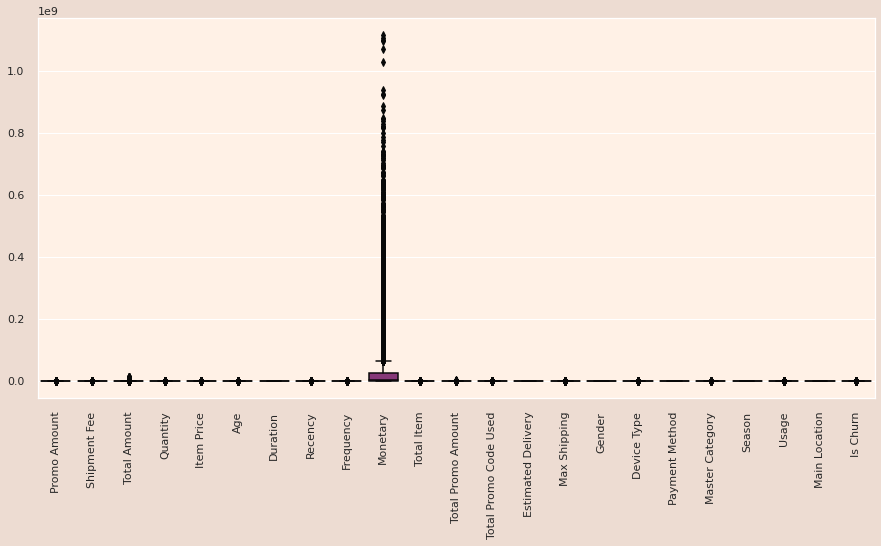

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(data=selected_cols, palette='magma')
plt.xticks(rotation=90)

### Reducing Dimensionality Dataset

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_dataset)
PCA_ds = pd.DataFrame(pca.transform(scaled_dataset), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,50705.0,-1.233168e-17,0.492875,-0.671501,-0.465431,-0.066590,0.438952,1.070225
col2,50705.0,3.923715e-18,0.488455,-0.836307,-0.378596,-0.108128,0.202185,1.341605


### Clustering

Elbow Method to determine the number of clusters to be formed:


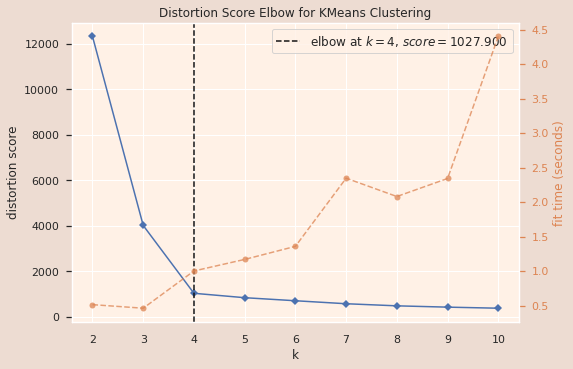

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model 
kmeans = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_kmeans = kmeans.fit_predict(PCA_ds)
#Adding the Clusters feature to the orignal dataframe.
selected_cols["Clusters"] = yhat_kmeans

In [ ]:
selected_cols.head()

,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping,Gender,Device Type,Payment Method,Master Category,Season,Usage,Main Location,Is Churn,Clusters
0,1415,10000,199832,1,191247,22,1,1463,1,199832,1,1415,1,5,5,0,0,1,2,2,0,1,1,2
1,3329,50000,245215,1,198544,27,1412,52,43,31135863,64,123186,43,1,6,0,0,0,2,0,0,0,0,1
2,9376,10000,171940,1,171316,9,1441,23,152,204722927,195,205903,152,4,6,1,0,4,1,2,0,0,0,1
3,0,10000,195705,1,185705,28,0,1464,1,195705,1,0,1,6,6,0,0,4,1,2,0,1,1,2
4,0,10000,131776,1,121776,25,977,487,3,545304,3,10448,3,3,3,0,0,3,2,2,0,0,1,3


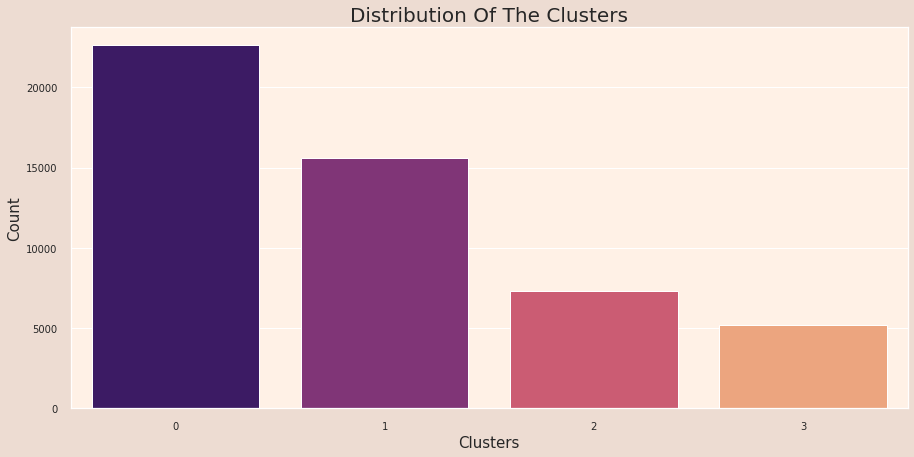

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=selected_cols["Clusters"], palette= 'magma')
plt.title('Distribution Of The Clusters', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
selected_cols.columns

Index(['Promo Amount', 'Shipment Fee', 'Total Amount', 'Quantity',
       'Item Price', 'Age', 'Duration', 'Recency', 'Frequency', 'Monetary',
       'Total Item', 'Total Promo Amount', 'Total Promo Code Used',
       'Estimated Delivery', 'Max Shipping', 'Gender', 'Device Type',
       'Payment Method', 'Master Category', 'Season', 'Usage', 'Main Location',
       'Is Churn', 'Clusters'],
      dtype='object')

In [ ]:
column = ['Promo Amount', 'Shipment Fee', 'Total Amount', 'Quantity',
       'Item Price', 'Age', 'Duration', 'Recency', 'Frequency', 'Monetary',
       'Total Item', 'Total Promo Amount', 'Total Promo Code Used',
       'Estimated Delivery', 'Max Shipping', ]
column

['Promo Amount',
 'Shipment Fee',
 'Total Amount',
 'Quantity',
 'Item Price',
 'Age',
 'Duration',
 'Recency',
 'Frequency',
 'Monetary',
 'Total Item',
 'Total Promo Amount',
 'Total Promo Code Used',
 'Estimated Delivery',
 'Max Shipping']

In [ ]:
sum_customer = selected_cols.groupby('Clusters')['Recency'].count().reset_index()
sum_customer
 

,Clusters,Recency
0,0,22624
1,1,15615
2,2,7268
3,3,5198


In [ ]:
modus_churn = selected_cols.groupby('Clusters')['Is Churn'].agg(pd.Series.mode).reset_index()
modus_churn

,Clusters,Is Churn
0,0,0
1,1,0
2,2,1
3,3,1


In [ ]:
cluster = selected_cols.groupby('Clusters')[column].mean().reset_index()
cluster

,Clusters,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping
0,0,1833.499912,9289.029349,551692.992574,1.499249,250216.662085,26.896968,780.222153,98.681091,31.988243,3.784634e+07,47.173356,65146.154526,31.988243,3.507868,5.391885
1,1,1844.824976,9234.390010,542967.766507,1.460647,249679.125136,26.856868,786.912776,98.694781,32.027153,3.785380e+07,47.240474,65684.617675,32.027153,3.481268,5.381684
2,2,2127.365162,9193.725922,553672.645845,1.506054,248711.837094,26.979774,370.388140,914.932168,2.447578,2.712550e+06,3.665520,5472.735691,2.447578,3.542928,3.990782
3,3,2058.310889,9270.873413,550744.043286,1.454790,248388.433821,26.753174,374.939207,912.200077,2.499038,2.952511e+06,3.678915,5515.825510,2.499038,3.523278,3.983070


In [ ]:
cluster['n_cust'] = sum_customer['Recency']
cluster['mode_is_churn'] = modus_churn['Is Churn']
cluster

,Clusters,Promo Amount,Shipment Fee,Total Amount,Quantity,Item Price,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Estimated Delivery,Max Shipping,n_cust,mode_is_churn
0,0,1833.499912,9289.029349,551692.992574,1.499249,250216.662085,26.896968,780.222153,98.681091,31.988243,3.784634e+07,47.173356,65146.154526,31.988243,3.507868,5.391885,22624,0
1,1,1844.824976,9234.390010,542967.766507,1.460647,249679.125136,26.856868,786.912776,98.694781,32.027153,3.785380e+07,47.240474,65684.617675,32.027153,3.481268,5.381684,15615,0
2,2,2127.365162,9193.725922,553672.645845,1.506054,248711.837094,26.979774,370.388140,914.932168,2.447578,2.712550e+06,3.665520,5472.735691,2.447578,3.542928,3.990782,7268,1
3,3,2058.310889,9270.873413,550744.043286,1.454790,248388.433821,26.753174,374.939207,912.200077,2.499038,2.952511e+06,3.678915,5515.825510,2.499038,3.523278,3.983070,5198,1


Terdapat 4 grup atau cluster, yaitu:

1. Cluster 0 terdapat 22624 customer, dengan rata-rata recencynya adalah 98 hari, frequency 31, dan monetary 3.784634e+07. Berarti cluster ini memiliki customer yang yang cukup baru-baru saja dalam melakukan pembelian lagi. Rata-rata order 31 kali dan rata-rata total uang yang  dikeluarkan banyak.

2. Cluster 1 terdapat 15615 customer, dengan rata-rata recencynya adalah 98 hari, frequency 32, dan monetary 3.785380e+07. Berarti cluster ini memiliki customer yang cukup baru-baru saja dalam melakukan pembelian lagi. Rata-rata order 32 kali dan rata-rata total uang yang dikeluarkan banyak.

3. Cluster 2 terdapat 7268 customer, dengan rata-rata recencynya adalah 914 hari, frequency 2, dan monetary 2.712550e+06. Berarti cluster ini memiliki customer sudah lama dalam melakukan pembelian lagi. Rata-rata order cuma 2 kali dan rata-rata total uang yang dikeluarkan sedikit.

4. Cluster 3 terdapat 5198 customer, dengan rata-rata recencynya adalah 912 hari, frequency 2, dan monetary 2.952511e+06. Berarti cluster ini memiliki customer sudah lama dalam melakukan pembelian lagi. Rata-rata order cuma 2 kali dan rata-rata total uang yang dikeluarkan sedikit.

Tidak terdapat perbedaan yang  signifakan antara cluster 0,1 dan 2,3. Kedua kluster tersebut memiliki persamaan di RFM nya.

# Modeling

## Preprocessing

### Feature Selection

In [ ]:
X = reduced_dataset[['Shipment Fee',
                     'Age', 
                     'Duration', 
                     'Recency',
                     'Frequency',	
                     'Monetary',	
                     'Total Item',
                     'Total Promo Amount',
                     'Total Promo Code Used', 
                     'Max Shipping',
                     'Gender',
                     'Device Type', 
                     'Payment Method',
                     'Main Location']]

y = reduced_dataset['Is Churn'] 

In [ ]:
X

,Shipment Fee,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Max Shipping,Gender,Device Type,Payment Method,Main Location
0,10000,22,1,1463,1,199832,1,1415,1,5,F,Android,Debit Card,Pulau Jawa
1,50000,27,1412,52,43,31135863,64,123186,43,6,F,Android,Credit Card,Luar Pulau Jawa
2,10000,9,1441,23,152,204722927,195,205903,152,6,M,Android,OVO,Luar Pulau Jawa
3,10000,28,0,1464,1,195705,1,0,1,6,F,Android,OVO,Pulau Jawa
4,10000,25,977,487,3,545304,3,10448,3,3,F,Android,LinkAja,Luar Pulau Jawa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,0,30,313,313,2,514508,3,0,2,6,M,Android,Debit Card,Pulau Jawa
50701,10000,17,1,234,1,359203,1,5010,1,3,F,Android,OVO,Luar Pulau Jawa
50702,5000,32,3,232,1,1158159,4,2181,1,1,F,Android,Credit Card,Pulau Jawa
50703,0,15,0,956,1,184143,1,4503,1,5,F,iOS,Credit Card,Pulau Jawa


### Label Encoding

In [ ]:
# Encoding
X = pd.get_dummies(X)
X

,Shipment Fee,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Max Shipping,Gender_F,Gender_M,Device Type_Android,Device Type_iOS,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Gopay,Payment Method_LinkAja,Payment Method_OVO,Main Location_Luar Pulau Jawa,Main Location_Pulau Jawa
0,10000,22,1,1463,1,199832,1,1415,1,5,1,0,1,0,0,1,0,0,0,0,1
1,50000,27,1412,52,43,31135863,64,123186,43,6,1,0,1,0,1,0,0,0,0,1,0
2,10000,9,1441,23,152,204722927,195,205903,152,6,0,1,1,0,0,0,0,0,1,1,0
3,10000,28,0,1464,1,195705,1,0,1,6,1,0,1,0,0,0,0,0,1,0,1
4,10000,25,977,487,3,545304,3,10448,3,3,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,0,30,313,313,2,514508,3,0,2,6,0,1,1,0,0,1,0,0,0,0,1
50701,10000,17,1,234,1,359203,1,5010,1,3,1,0,1,0,0,0,0,0,1,1,0
50702,5000,32,3,232,1,1158159,4,2181,1,1,1,0,1,0,1,0,0,0,0,0,1
50703,0,15,0,956,1,184143,1,4503,1,5,1,0,0,1,1,0,0,0,0,0,1


### Data Normalization

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X),columns= X.columns )

In [ ]:
X.describe()

,Shipment Fee,Age,Duration,Recency,Frequency,Monetary,Total Item,Total Promo Amount,Total Promo Code Used,Max Shipping,Gender_F,Gender_M,Device Type_Android,Device Type_iOS,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Gopay,Payment Method_LinkAja,Payment Method_OVO,Main Location_Luar Pulau Jawa,Main Location_Pulau Jawa
count,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000,50705.000000
mean,0.185134,0.325930,0.307618,0.134662,0.029458,0.026171,0.028218,0.016756,0.029458,0.673914,0.641909,0.358091,0.767814,0.232186,0.352391,0.161306,0.200454,0.087684,0.198166,0.410472,0.589528
std,0.189207,0.119049,0.276390,0.196392,0.054835,0.057582,0.052207,0.034850,0.054835,0.216656,0.479444,0.479444,0.422231,0.422231,0.477720,0.367816,0.400344,0.282837,0.398622,0.491924,0.491924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.245902,0.045557,0.017560,0.001241,0.000790,0.001590,0.000802,0.001241,0.666667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.200000,0.311475,0.252143,0.049527,0.008685,0.004585,0.008744,0.004254,0.008685,0.833333,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.200000,0.393443,0.511051,0.161639,0.032258,0.024089,0.031002,0.016703,0.032258,0.833333,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info

array([2.74972498e-03, 0.00000000e+00, 1.90873614e-01, 5.57743552e-01,
       2.28211602e-01, 1.71933816e-01, 2.08114189e-01, 1.33651315e-01,
       2.28932629e-01, 1.12126344e-01, 2.25337217e-03, 1.29642222e-03,
       3.94889831e-03, 0.00000000e+00, 9.78150790e-04, 0.00000000e+00,
       2.84170622e-03, 3.74503843e-04, 4.07826316e-03, 3.17698973e-03,
       1.78628189e-03])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Recency                          0.557744
Total Promo Code Used            0.228933
Frequency                        0.228212
Total Item                       0.208114
Duration                         0.190874
Monetary                         0.171934
Total Promo Amount               0.133651
Max Shipping                     0.112126
Payment Method_OVO               0.004078
Device Type_Android              0.003949
Main Location_Luar Pulau Jawa    0.003177
Payment Method_Gopay             0.002842
Shipment Fee                     0.002750
Gender_F                         0.002253
Main Location_Pulau Jawa         0.001786
Gender_M                         0.001296
Payment Method_Credit Card       0.000978
Payment Method_LinkAja           0.000375
Payment Method_Debit Card        0.000000
Device Type_iOS                  0.000000
Age                              0.000000
dtype: float64

## Machine Learning Models

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test,\
y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (38028, 21)
y_train dataset shape:  (38028,)
X_test dataset shape:  (12677, 21)
y_test dataset shape:  (12677,)


### Baseline Models

In [ ]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
# Modelling Algorithms
# StratifiedKFold adalah Cross Validation (CV)

kf = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
             LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
             SVC,
             LinearSVC,
             RandomForestClassifier,
             GradientBoostingClassifier,
             ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
              'LogisticRegression',
              'KNeighborsClassifier',
              'GaussianNB',
              'SVC',
              'LinearSVC',
              'RandomForestClassifier',
              'GradientBoostingClassifier',
              'ExtraTreesClassifier',
              'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 2
DecisionTreeClassifier Acc Test: [], 1 of KFold 2
DecisionTreeClassifier Recall: [], 1 of KFold 2
DecisionTreeClassifier Precission: [], 1 of KFold 2
DecisionTreeClassifier AUC: [], 1 of KFold 2
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 2
DecisionTreeClassifier Acc Test: [1.0], 1 of KFold 2
DecisionTreeClassifier Recall: [1.0], 1 of KFold 2
DecisionTreeClassifier Precission: [1.0], 1 of KFold 2
DecisionTreeClassifier AUC: [1.0], 1 of KFold 2
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 2
DecisionTreeClassifier Acc Test: [1.0], 2 of KFold 2
DecisionTreeClassifier Recall: [1.0], 2 of KFold 2
DecisionTreeClassifier Precission: [1.0], 2 of KFold 2
DecisionTreeClassifier AUC: [1.0], 2 of KFold 2
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: 

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC'] = auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
0,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,LinearSVC,0.996411,0.995977,0.995717,0.987887,0.993251,0.000434
8,ExtraTreesClassifier,1.000000,0.989942,0.988319,0.970560,0.983410,0.010058
1,LogisticRegression,0.988206,0.987654,0.999325,0.950425,0.975108,0.000552
4,SVC,0.986254,0.983651,0.997435,0.935906,0.967561,0.002603
2,KNeighborsClassifier,0.966335,0.946692,0.963634,0.813894,0.901939,0.019643
3,GaussianNB,0.733202,0.732610,0.478605,0.979464,0.815800,0.000592


### DecisionTreeClassifier 

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
report = classification_report(y_true=y_test, y_pred=model.predict(X_test))
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     19119
        True       1.00      1.00      1.00      6233

    accuracy                           1.00     25352
   macro avg       1.00      1.00      1.00     25352
weighted avg       1.00      1.00      1.00     25352



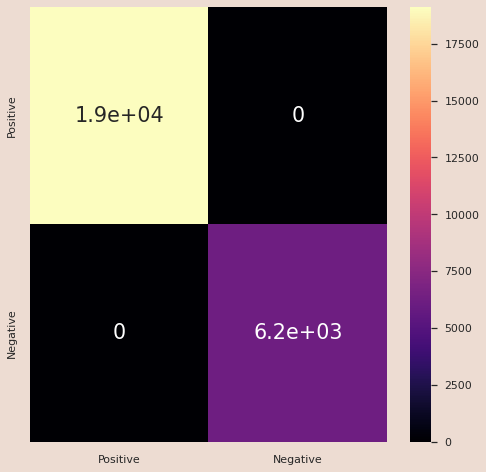

In [ ]:
confusion = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='magma')

plt.show()

In [ ]:
predict = pd.DataFrame(y_pred)

In [ ]:
real = pd.DataFrame(y_test)

In [ ]:
predict.value_counts()

False    19119
True      6233
dtype: int64

In [ ]:
real.value_counts()

Is Churn
False       19119
True         6233
dtype: int64

#### Feature Importance

In [ ]:
model.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=model.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(title='<b>Estimating feature importance through the DecisionTreeClassifier model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature', barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

### RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)

In [ ]:
report_random_forest = classification_report(y_true=y_test, y_pred=random_forest.predict(X_test))
print(report_random_forest)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     19119
        True       1.00      1.00      1.00      6233

    accuracy                           1.00     25352
   macro avg       1.00      1.00      1.00     25352
weighted avg       1.00      1.00      1.00     25352



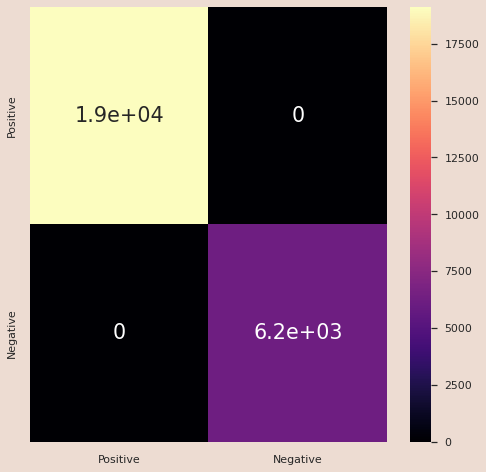

In [ ]:
confusion_random_forest = confusion_matrix(y_true=y_test, y_pred=random_forest.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_random_forest,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='magma')

plt.show()

#### Feature Importance

In [ ]:
random_forest.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=random_forest.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(title='<b>Estimating feature importance through the RandomForestClassifier model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature', barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

### GradientBoostingClassifier	

In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train,y_train)
y_pred=gradient_boosting.predict(X_test)

In [ ]:
report_gradient_boosting = classification_report(y_true=y_test, y_pred=gradient_boosting.predict(X_test))
print(report_gradient_boosting)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     19119
        True       1.00      1.00      1.00      6233

    accuracy                           1.00     25352
   macro avg       1.00      1.00      1.00     25352
weighted avg       1.00      1.00      1.00     25352



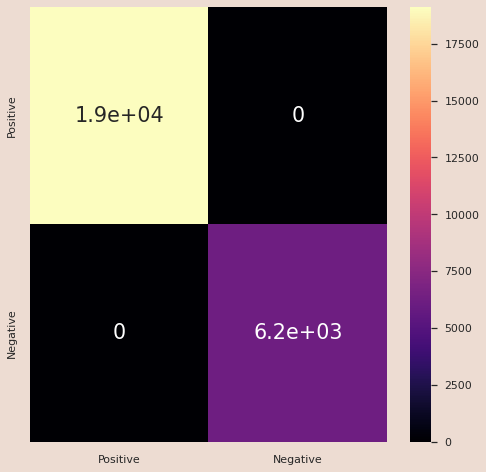

In [ ]:
confusion_gradient_boosting = confusion_matrix(y_true=y_test, y_pred=gradient_boosting.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_gradient_boosting,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='magma')

plt.show()

#### Feature Importance

In [ ]:
gradient_boosting.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=gradient_boosting.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(title='<b>Estimating feature importance through the GradientBoostingClassifier model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature', barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

### XGBClassifier

In [ ]:
XGBClassifier = XGBClassifier()
XGBClassifier.fit(X_train,y_train)
y_pred=XGBClassifier.predict(X_test)

In [ ]:
report_XGBClassifier = classification_report(y_true=y_test, y_pred=XGBClassifier.predict(X_test))
print(report_XGBClassifier)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     19119
        True       1.00      1.00      1.00      6233

    accuracy                           1.00     25352
   macro avg       1.00      1.00      1.00     25352
weighted avg       1.00      1.00      1.00     25352



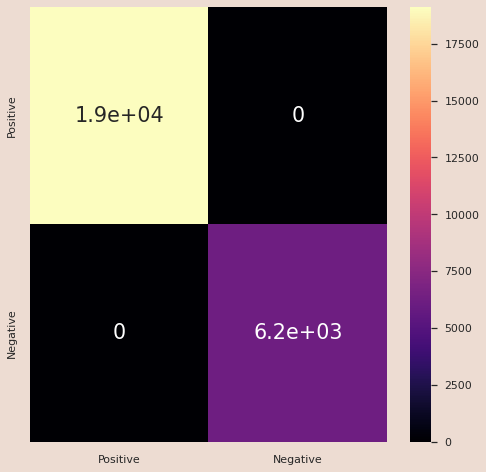

In [ ]:
confusion_XGBClassifier = confusion_matrix(y_true=y_test, y_pred=XGBClassifier.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_XGBClassifier,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='magma')

plt.show()

#### Feature Importance

In [ ]:
XGBClassifier.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=XGBClassifier.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(title='<b>Estimating feature importance through the XGBClassifier model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature', barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

## Hyperparameter Tuning

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

### DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier()

param_dtc = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, 0.0001],
              'max_depth' : [5, 10, 20, 40, 80, 160, 320, 640],
              'criterion' :['gini', 'entropy', 'log_loss']
             }

cv = StratifiedKFold(n_splits=2)

dtc = GridSearchCV(estimator=dt_classifier, 
                 param_grid=param_dtc, 
                 cv=cv,
                 verbose=4, 
                 scoring='accuracy') 
dtc.fit(X_train, y_train)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.962 total time=   0.0s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=0.754 total time=   0.0s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=1.000 total time=   0.0s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.957 total time=   0.0s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2;, score=1.000 total time=   0.0s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=log2;, score=0.754 total time=   0.0s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=auto;, score=0.754 total time=   0.1s
[CV 2/2] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=auto;, score=1.000 total time=   0.0s
[CV 1/2] END ccp_alpha=0.1, criterion=gini, max_depth=10, max_features=

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001, 0.0001],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 40, 80, 160, 320, 640],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy', verbose=4)

In [ ]:
print('Best Score: {}'.format(dtc.best_score_))
print('Best Hyperparameters: {}'.format(dtc.best_params_))

Best Score: 1.0
Best Hyperparameters: {'ccp_alpha': 0.1, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2'}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (40564, 21)
y_train dataset shape:  (40564,)
X_test dataset shape:  (10141, 21)
y_test dataset shape:  (10141,)


In [ ]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = DecisionTreeClassifier(**dtc.best_params_)

In [ ]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

In [ ]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97     30585
        True       1.00      0.81      0.90      9979

    accuracy                           0.95     40564
   macro avg       0.97      0.91      0.93     40564
weighted avg       0.96      0.95      0.95     40564



In [ ]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       False       0.94      1.00      0.97      7654
        True       1.00      0.81      0.90      2487

    accuracy                           0.95     10141
   macro avg       0.97      0.91      0.93     10141
weighted avg       0.96      0.95      0.95     10141



### RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier()

param_RFC = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 20, 40, 80, 160, 320, 640],
    'criterion' :['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=2)

rfc = GridSearchCV(estimator=rf_classifier, 
                 param_grid=param_RFC,
                 cv = cv, 
                 verbose=4)

rfc.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=0.999 total time=   1.9s
[CV 2/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=1.000 total time=   2.1s
[CV 1/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=0.999 total time=   4.6s
[CV 2/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=1.000 total time=   5.9s
[CV 1/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=0.999 total time=   1.7s
[CV 2/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=1.000 total time=   2.0s
[CV 1/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=0.999 total time=   4.7s
[CV 2/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=1.000 total time=   4.5s
[CV 1/2] END criterion=gini, max_depth=5, max_feat

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 80, 160, 320, 640],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=4)

In [ ]:
print('Best Score: {}'.format(rfc.best_score_))
print('Best Hyperparameters: {}'.format(rfc.best_params_))

Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (40564, 21)
y_train dataset shape:  (40564,)
X_test dataset shape:  (10141, 21)
y_test dataset shape:  (10141,)


In [ ]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = RandomForestClassifier(**rfc.best_params_)

In [ ]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

In [ ]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     30585
        True       1.00      1.00      1.00      9979

    accuracy                           1.00     40564
   macro avg       1.00      1.00      1.00     40564
weighted avg       1.00      1.00      1.00     40564



In [ ]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7654
        True       1.00      1.00      1.00      2487

    accuracy                           1.00     10141
   macro avg       1.00      1.00      1.00     10141
weighted avg       1.00      1.00      1.00     10141



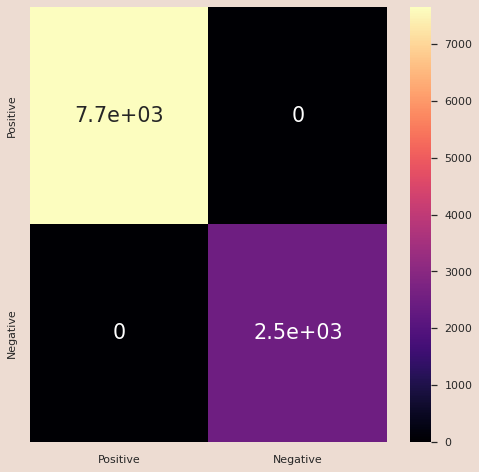

In [ ]:
confusion = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='magma')

plt.show()

>Confusion Matrix dari Data Testing menunjukan bahwa nilai dari FP (False Positive) dan nilai dari FN (False Negative) seimbang (Symetric) yaitu `0 : 0`, sehingga metrik yang kami gunakan adalah `accuracy` dengan skor `1.0`

### GradientBoostingClassifier

In [ ]:
gb_classifier = GradientBoostingClassifier()

param_GBC = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    # "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    # "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

gbc = StratifiedKFold(n_splits=2)

gbc = GridSearchCV(estimator=gb_classifier, 
                 param_grid=param_GBC,
                 cv = cv, 
                 verbose=4)

gbc.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=10;, score=0.754 total time=   0.1s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=log2, n_estimators=10;, score=0.754 total time=   0.1s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=sqrt, n_estimators=10;, score=0.754 total time=   0.1s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.01, loss=deviance, max_features=sqrt, n_estimators=10;, score=0.754 total time=   0.1s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_features=log2, n_estimators=10;, score=0.768 total time=   0.1s
[CV 2/2] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_features=log2, n_estimators=10;, score=0.903 total time=   0.1s
[CV 1/2] END criterion=friedman_mse, learning_rate=0.05, loss=deviance, max_features=sqrt, n_estima

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                         'loss': ['deviance'], 'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10]},
             verbose=4)

In [ ]:
print('Best Score: {}'.format(gbc.best_score_))
print('Best Hyperparameters: {}'.format(gbc.best_params_))

Best Score: 0.9989349952666456
Best Hyperparameters: {'criterion': 'mae', 'learning_rate': 0.2, 'loss': 'deviance', 'max_features': 'sqrt', 'n_estimators': 10}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (40564, 21)
y_train dataset shape:  (40564,)
X_test dataset shape:  (10141, 21)
y_test dataset shape:  (10141,)


In [ ]:
modeltun = GradientBoostingClassifier(**gbc.best_params_)

In [ ]:
model_fit = modeltun.fit(X_train,y_train)

In [ ]:
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00     30585
        True       1.00      0.98      0.99      9979

    accuracy                           1.00     40564
   macro avg       1.00      0.99      0.99     40564
weighted avg       1.00      1.00      1.00     40564



In [ ]:
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7654
        True       1.00      0.98      0.99      2487

    accuracy                           1.00     10141
   macro avg       1.00      0.99      0.99     10141
weighted avg       1.00      1.00      1.00     10141



### XGBClassifier

In [ ]:
xgb_classifier = XGBClassifier()

param_XGBC = {
    'objective':['binary:logistic'],
    'learning_rate': [0.05],
    # 'max_depth': [6],
    # 'min_child_weight': [11],
    'silent': [1],
    'subsample': [0.8],
    # 'colsample_bytree': [0.7],
    'n_estimators': [200, 500],
    # 'missing':[-999],
    # 'seed': [1337]
    }

xgbc = StratifiedKFold(n_splits=2)

xgbc = GridSearchCV(estimator=xgb_classifier, 
                 param_grid=param_XGBC,
                 cv = cv, 
                 verbose=4)

xgbc.fit(X, y)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END learning_rate=0.05, n_estimators=200, objective=binary:logistic, silent=1, subsample=0.8;, score=1.000 total time=   3.2s
[CV 2/2] END learning_rate=0.05, n_estimators=200, objective=binary:logistic, silent=1, subsample=0.8;, score=1.000 total time=   3.2s
[CV 1/2] END learning_rate=0.05, n_estimators=500, objective=binary:logistic, silent=1, subsample=0.8;, score=1.000 total time=   6.1s
[CV 2/2] END learning_rate=0.05, n_estimators=500, objective=binary:logistic, silent=1, subsample=0.8;, score=1.000 total time=   6.2s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.05], 'n_estimators': [200, 500],
                         'objective': ['binary:logistic'], 'silent': [1],
                         'subsample': [0.8]},
             verbose=4)

In [ ]:
print('Best Score: {}'.format(xgbc.best_score_))
print('Best Hyperparameters: {}'.format(xgbc.best_params_))

Best Score: 1.0
Best Hyperparameters: {'learning_rate': 0.05, 'n_estimators': 200, 'objective': 'binary:logistic', 'silent': 1, 'subsample': 0.8}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (40564, 21)
y_train dataset shape:  (40564,)
X_test dataset shape:  (10141, 21)
y_test dataset shape:  (10141,)


In [ ]:
modeltun = XGBClassifier(**xgbc.best_params_)

In [ ]:
model_fit = modeltun.fit(X_train,y_train)

In [ ]:
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     30585
        True       1.00      1.00      1.00      9979

    accuracy                           1.00     40564
   macro avg       1.00      1.00      1.00     40564
weighted avg       1.00      1.00      1.00     40564



In [ ]:
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7654
        True       1.00      1.00      1.00      2487

    accuracy                           1.00     10141
   macro avg       1.00      1.00      1.00     10141
weighted avg       1.00      1.00      1.00     10141



# Recomendation



> Beberapa Rekomendasi dari kami sebagai berikut

* Perusahaan harus meningkatkan lagi nilai dari potongan harga untuk menarik perhatian pelanggan agar melakukan pembelian
* Menambah lebih banyak lagi promo gratis ongkos kirim guna meningkatkan kesetiaan pelanggan terutama yang berada di Pulau Jawa sebagai peminat tertinggi
* Menambah lebih banyak lagi produk-produk yang umumnya disukai perempuan sebagai mayoritas pelanggan
*   Pemberian promo yang lebih besar terhadap penggunaan credit card agar pelanggan tertarik dan dapat mengurangi churn karena pelanggan lebih banyak transaksi menggunakan credit card
*   Pelanggan yang churn merupakan pelanggan tidak kembali lagi ke platform untuk melakukan transaksi. Sehingga, pemberian promo yang menarik atau cashback secara berkala perlu diberikan agar menarik perhatian pelanggan.
*   Model ML yang terpilih untuk memprediksi customer churn adalah model RandomForestClassifier





# END